In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(9838, 83)

In [4]:
test.shape

(22957, 83)

In [5]:
#文本/日期/100%分本形式/fvdummy/neighbourhood地理位置/host listing/vertification/steet+neighbourhood/zipcode/smart location/property type/ bed type/ amenities/ cancellation ordering/price 文本，去掉逗号

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train.head(10)

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_discount,monthly_discount,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,Private room + garden 2mins walk to everywhere.,"2 rooms new apartment, your stay with private ...","2 bedroom apartment, you got one of the room a...","2 rooms new apartment, your stay with private ...",none,NaN,NaN,NaN,NaN,NaN,Keep quiet after 9pm No BBQ No party No extra ...,35821676,2015-06-14,"Cheltenham, New South Wales, Australia",NaN,within an hour,100%,NaN,f,NaN,9.0,9.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"Beecroft, NSW, Australia",NaN,Hornsby,Beecroft,2119.0,"Beecroft, Australia",-33.74843,151.06609,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,""Smok...",NaN,NaN,NaN,259.0,69.0,1,52.0,2,1125,2,2,1125,1125,2.0,1125.0,13,21,51,326,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,moderate,f,f,7,5,2,0,NaN,$58.00
1,"On the Beachfront, next to cafes and restaurants.",Beachfront balcony and next to cafes and resta...,"Happy to accommodate your requests, as best we...",Beachfront balcony and next to cafes and resta...,none,"Comfortable, relaxed, beachy with ample cafes ...",NaN,The bus stop is within 50m of the front door. ...,NaN,NaN,NaN,61001305,2016-02-29,"New South Wales, Australia",Living a relaxed lifestyle on the beach. Mini...,within a day,100%,NaN,f,NaN,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"Dee Why, NSW, Australia",NaN,Warringah,Dee Why,2099.0,"Dee Why, Australia",-33.75546,151.29509,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Family...",NaN,NaN,NaN,160.0,68.0,2,8.0,3,60,3,3,60,60,3.0,60.0,1,14,44,311,2,1,2018-05-27,2018-12-30,70.0,10.0,7.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.15,$125.00
2,Room in Camperdown,"Excellent location! Close to superb bars, cafe...",NaN,"Excellent location! Close to superb bars, cafe...",none,NaN,NaN,NaN,NaN,NaN,NaN,8930702,2013-09-19,AU,NaN,NaN,NaN,NaN,f,Camperdown,1.0,1.0,"['email', 'phone']",f,"Camperdown, NSW, Australia",Camperdown,Marrickville,Camperdown,2050,"Camperdown, Australia",-33.89182,151.17723,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Washer,Essentials}",NaN,NaN,NaN,NaN,NaN,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f,1,0,1,0,NaN,$99.00
3,Beautiful room in summer hill,"A Typical inner west sydney share house, you w...","Living room, out back balcony, kitchen, bathro...","A Typical inner west sydney share house, you w...",none,"Summer hill, is a gorgeous and quiet inner we...","Make yourself at home, enjoy 

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 83 columns):
name                                            9838 non-null object
summary                                         9838 non-null object
space                                           7184 non-null object
description                                     9838 non-null object
experiences_offered                             9838 non-null object
neighborhood_overview                           6400 non-null object
notes                                           4300 non-null object
transit                                         6469 non-null object
access                                          5946 non-null object
interaction                                     5960 non-null object
house_rules                                     5851 non-null object
host_id                                         9838 non-null int64
host_since                                      9838 non-null obje

In [8]:
#missing values
train.isnull().sum()

name                                               0
summary                                            0
space                                           2654
description                                        0
experiences_offered                                0
neighborhood_overview                           3438
notes                                           5538
transit                                         3369
access                                          3892
interaction                                     3878
house_rules                                     3987
host_id                                            0
host_since                                         0
host_location                                      8
host_about                                      4363
host_response_time                              4566
host_response_rate                              4566
host_acceptance_rate                            9838
host_is_superhost                             

In [9]:
train_d=train.copy()
test_d=test.copy()

In [10]:
#drop variables
train_fill = train_d.drop(['square_feet','weekly_discount','monthly_discount','host_acceptance_rate','neighbourhood','host_id'], axis='columns')
test_fill = test_d.drop(['square_feet','weekly_discount', 'monthly_discount', 'host_acceptance_rate','neighbourhood','host_id'], axis='columns')
#neighbourhood与neighbourhood_cleansed一样
test_fill_1 = test_fill

In [11]:
#filling 文本
fill_none=['space','neighborhood_overview','transit','access', 'house_rules','host_neighbourhood','host_response_time']
train_fill[fill_none]=train_fill[fill_none].fillna('none')

In [12]:
#filling 0
train_fill['host_response_rate']=train_fill['host_response_rate'].fillna('0%')


In [13]:
train_fill['reviews_per_month']=train_fill['reviews_per_month'].fillna('0')

In [14]:
#filling mean/mood/median
train_fill['security_deposit_perc']=train_fill['security_deposit_perc'].fillna(train_fill['security_deposit_perc'].mean())
train_fill['cleaning_fee_perc']=train_fill['cleaning_fee_perc'].fillna(train_fill['cleaning_fee_perc'].median())


In [15]:
#filling date
train_fill['first_review']=pd.to_datetime(train_fill['first_review'])
train_fill['last_review']=pd.to_datetime(train_fill['last_review'])
train_fill['review_g']=(train_fill['last_review']-train_fill['first_review'])

train_fill['review_g']=train_fill['review_g'].dt.days
train_fill['review_g']=train_fill['review_g'].fillna(train_fill['review_g'].mean())

train_fill=train_fill.drop(['first_review','last_review'], axis='columns')

In [16]:
#filling interpolate
fill_interpo=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
train_fill[fill_interpo]=train_fill[fill_interpo].interpolate()

In [17]:
#
v=['notes','interaction','host_about']
for feature in v:
    train_fill[feature]=train_fill[feature].apply(lambda x:0 if pd.isnull(x) else 1)

In [18]:
fill_0=['bathrooms','bedrooms','beds']
train_fill[fill_0]=train_fill[fill_0].fillna('0')

In [19]:
train_fill['host_location']=train_fill['host_location'].fillna('none')

In [20]:
train_fill=train_fill.dropna(subset=['city', 'zipcode', 'cancellation_policy','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])

In [21]:
train_fill.shape

(9803, 76)

In [22]:
#test

In [23]:
fill_none=['space','neighborhood_overview','transit','access', 'house_rules','host_neighbourhood','host_response_time']
test_fill_1[fill_none]=test_fill_1[fill_none].fillna('none')


In [24]:
test_fill_1['host_response_rate']=test_fill_1['host_response_rate'].fillna('0%')
test_fill_1['reviews_per_month']=test_fill_1['reviews_per_month'].fillna('0')

In [25]:
test_fill_1['security_deposit_perc']=test_fill_1['security_deposit_perc'].fillna(test_fill_1['security_deposit_perc'].mean())
test_fill_1['cleaning_fee_perc']=test_fill_1['cleaning_fee_perc'].fillna(test_fill_1['cleaning_fee_perc'].median())

In [26]:
test_fill_1['first_review']=pd.to_datetime(test_fill_1['first_review'])
test_fill_1['last_review']=pd.to_datetime(test_fill_1['last_review'])
test_fill_1['review_g']=(test_fill_1['last_review']-test_fill_1['first_review'])

test_fill_1['review_g']=test_fill_1['review_g'].dt.days
test_fill_1['review_g']=test_fill_1['review_g'].fillna(test_fill_1['review_g'].mean())

test_fill_1=test_fill_1.drop(['first_review','last_review'], axis='columns')

In [27]:
fill_interpo=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
test_fill_1[fill_interpo]=test_fill_1[fill_interpo].interpolate()


In [28]:
v=['notes','interaction','host_about']
for feature in v:
    test_fill_1[feature]=test_fill_1[feature].apply(lambda x:0 if pd.isnull(x) else 1)
    

In [29]:
fill_0=['bathrooms','bedrooms','beds']
test_fill_1[fill_0]=test_fill[fill_0].fillna('0')
#test_fill_1['bathrooms']=train_fill['bathrooms'].fillna(0)


In [30]:
test_fill_1['host_location']=test_fill_1['host_location'].fillna('none')

In [31]:
test_fill_1.shape

(22957, 76)

In [32]:
#Feature engineering1
train_FE=train_fill.copy()
test_FE=test_fill_1.copy()


In [33]:
#处理y
train_FE['price']=train_FE['price'].apply(lambda x : float(x.split('$')[1].replace(',','')))

In [34]:
type(train_FE['price'])

pandas.core.series.Series

In [35]:
train77_text=train_fill.copy()

In [36]:
import nltk
#nltk.download()

In [37]:
from nltk.tokenize import TweetTokenizer

tweet=train77_text.loc[9803, 'description'] 
Tokenizer = TweetTokenizer()
tokenized = Tokenizer.tokenize(tweet)


print('Original:')
print(tweet)
print('\nTokenized:')
print(tokenized)

Original:
Welcome to my beautiful, open and bright home in the heart of Bondi Village. It is a 1 bedroom apartment, the perfect fit for couples or 2 friends. It is conveniently located in a calm street but just 5 min away from the beach. Enjoy a sunny swim at the world-famous Bondi Beach, a tour of the coastal walk, and the great coffees and restaurants of Bondi. Relax on the cozy balcony and take it easy with a cup of coffee. 1 bedroom, an bright and open leaving room giving on the balcony and an open brand new modern kitchen. I will be available at any time through my mobile. Love to start my day with a flat white on the balcony,  have a swim or a surf at the beach, brunch at Trio cafe with sea-view, stroll on the coastal walk in the afternoon, go to Yoga, and enjoy dinner at one of my favourite Bondi restaurants: Drake Eatery or Totti's! 3 min from the 333 or 380 bus stops

Tokenized:
['Welcome', 'to', 'my', 'beautiful', ',', 'open', 'and', 'bright', 'home', 'in', 'the', 'heart', 'o

In [38]:
import string
punctuation = list(string.punctuation)
punctuation.remove('!')
tokenized_no_punctuation=[word.lower() for word in tokenized if word not in punctuation]
print(tokenized_no_punctuation)

['welcome', 'to', 'my', 'beautiful', 'open', 'and', 'bright', 'home', 'in', 'the', 'heart', 'of', 'bondi', 'village', 'it', 'is', 'a', '1', 'bedroom', 'apartment', 'the', 'perfect', 'fit', 'for', 'couples', 'or', '2', 'friends', 'it', 'is', 'conveniently', 'located', 'in', 'a', 'calm', 'street', 'but', 'just', '5', 'min', 'away', 'from', 'the', 'beach', 'enjoy', 'a', 'sunny', 'swim', 'at', 'the', 'world-famous', 'bondi', 'beach', 'a', 'tour', 'of', 'the', 'coastal', 'walk', 'and', 'the', 'great', 'coffees', 'and', 'restaurants', 'of', 'bondi', 'relax', 'on', 'the', 'cozy', 'balcony', 'and', 'take', 'it', 'easy', 'with', 'a', 'cup', 'of', 'coffee', '1', 'bedroom', 'an', 'bright', 'and', 'open', 'leaving', 'room', 'giving', 'on', 'the', 'balcony', 'and', 'an', 'open', 'brand', 'new', 'modern', 'kitchen', 'i', 'will', 'be', 'available', 'at', 'any', 'time', 'through', 'my', 'mobile', 'love', 'to', 'start', 'my', 'day', 'with', 'a', 'flat', 'white', 'on', 'the', 'balcony', 'have', 'a', 'sw

In [39]:
from nltk.corpus import stopwords
tokenized_no_stopwords=[word for word in tokenized_no_punctuation if word not in stopwords.words('english')]
print(tokenized_no_stopwords)

['welcome', 'beautiful', 'open', 'bright', 'home', 'heart', 'bondi', 'village', '1', 'bedroom', 'apartment', 'perfect', 'fit', 'couples', '2', 'friends', 'conveniently', 'located', 'calm', 'street', '5', 'min', 'away', 'beach', 'enjoy', 'sunny', 'swim', 'world-famous', 'bondi', 'beach', 'tour', 'coastal', 'walk', 'great', 'coffees', 'restaurants', 'bondi', 'relax', 'cozy', 'balcony', 'take', 'easy', 'cup', 'coffee', '1', 'bedroom', 'bright', 'open', 'leaving', 'room', 'giving', 'balcony', 'open', 'brand', 'new', 'modern', 'kitchen', 'available', 'time', 'mobile', 'love', 'start', 'day', 'flat', 'white', 'balcony', 'swim', 'surf', 'beach', 'brunch', 'trio', 'cafe', 'sea-view', 'stroll', 'coastal', 'walk', 'afternoon', 'go', 'yoga', 'enjoy', 'dinner', 'one', 'favourite', 'bondi', 'restaurants', 'drake', 'eatery', "totti's", '!', '3', 'min', '333', '380', 'bus', 'stops']


In [40]:
from nltk.stem.porter import PorterStemmer
tokens = [PorterStemmer().stem(word) for word in tokenized_no_stopwords]
print(tokens)

['welcom', 'beauti', 'open', 'bright', 'home', 'heart', 'bondi', 'villag', '1', 'bedroom', 'apart', 'perfect', 'fit', 'coupl', '2', 'friend', 'conveni', 'locat', 'calm', 'street', '5', 'min', 'away', 'beach', 'enjoy', 'sunni', 'swim', 'world-fam', 'bondi', 'beach', 'tour', 'coastal', 'walk', 'great', 'coffe', 'restaur', 'bondi', 'relax', 'cozi', 'balconi', 'take', 'easi', 'cup', 'coffe', '1', 'bedroom', 'bright', 'open', 'leav', 'room', 'give', 'balconi', 'open', 'brand', 'new', 'modern', 'kitchen', 'avail', 'time', 'mobil', 'love', 'start', 'day', 'flat', 'white', 'balconi', 'swim', 'surf', 'beach', 'brunch', 'trio', 'cafe', 'sea-view', 'stroll', 'coastal', 'walk', 'afternoon', 'go', 'yoga', 'enjoy', 'dinner', 'one', 'favourit', 'bondi', 'restaur', 'drake', 'eateri', "totti'", '!', '3', 'min', '333', '380', 'bu', 'stop']


In [41]:
def process_text(text):
    tokenized = Tokenizer.tokenize(text)
    punctuation = list(string.punctuation)
    punctuation.remove('!')
    tokenized_no_punctuation=[word.lower() for word in tokenized if word not in punctuation]
    tokenized_no_stopwords=[word for word in tokenized_no_punctuation if word not in stopwords.words('english')]
    tokens = [PorterStemmer().stem(word) for word in tokenized_no_stopwords if word != '️']
    return tokens

# Applies the process_text function separately to each element of the column 'text' 
train77_text['tokens']=train77_text['description'].apply(process_text)     

In [42]:
train77_text[['description','tokens']].head(10)

,description,tokens
1,Beachfront balcony and next to cafes and resta...,"[beachfront, balconi, next, cafe, restaur, sui..."
2,"Excellent location! Close to superb bars, cafe...","[excel, locat, !, close, superb, bar, cafe, pa..."
3,"A Typical inner west sydney share house, you w...","[typic, inner, west, sydney, share, hous, live..."
4,2 Bedroom Loft Apartment in a small complex. W...,"[2, bedroom, loft, apart, small, complex, well..."
5,WiFi: FREE! This appealing apartment is at Da...,"[wifi, free, !, appeal, apart, darl, harbour, ..."
6,Bright Central Darlinghurst apartment for you ...,"[bright, central, darlinghurst, apart, enjoy, ..."
7,Modern Chippendale Studio with High Ceiling. T...,"[modern, chippendal, studio, high, ceil, perso..."
8,"Located to the South of Bondi Beach, Overlooki...","[locat, south, bondi, beach, overlook, mark, p..."
9,"Dee Why Beach apartment - Cosy, renovated with...","[dee, beach, apart, cosi, renov, brand, new, f..."
10,"Very convenient location,5 mins walk to major ...","[conveni, locat, 5, min, walk, major, supermar..."


train77_text=train77_text['tokens']
data.to_hdf('Data/tweets_processed.h5', 'data')

In [43]:
fdist = nltk.FreqDist()
for words in train77_text['tokens']:
    for word in words:
            fdist[word] += 1

print(f'Number of unique tokens: {len(fdist)}')

Number of unique tokens: 18690


In [44]:
fdist.most_common()[:20]

[('walk', 11834),
 ('apart', 11419),
 ('bedroom', 10543),
 ('beach', 9635),
 ('room', 8136),
 ('minut', 7547),
 ('bed', 7331),
 ('sydney', 7293),
 ('locat', 7030),
 ('kitchen', 6795),
 ('live', 6050),
 ('park', 5895),
 ('area', 5807),
 ('2', 5671),
 ('bathroom', 5566),
 ('hous', 5533),
 ('citi', 5508),
 ('shop', 5187),
 ('!', 5174),
 ('home', 5034)]

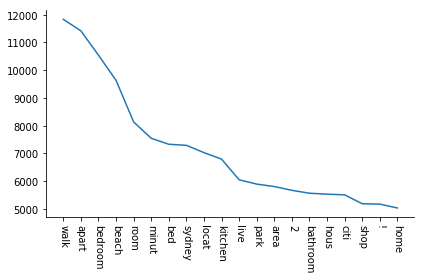

In [45]:
fig, ax = plt.subplots()

y = pd.Series(dict(fdist.most_common()[:20]))
y = y.sort_values(ascending=False)

y.plot()

indexes = np.arange(0, len(y)) # we will place ticks for every word
ax.set_xticks(indexes)
ax.set_xticklabels(y.index, rotation='-90')
ax.set_xlim(-1)

plt.tight_layout()

sns.despine()
plt.show()

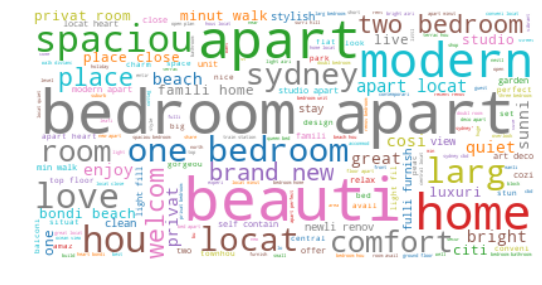

In [46]:
plt.rcParams['figure.figsize'] = (9, 6)
positive_tweets = train77_text['tokens']

from wordcloud import WordCloud

fig, ax = plt.subplots()
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(str(positive_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
#date 
train_FE['host_since']=pd.to_datetime(train_FE['host_since'])
train_FE['host_since_max']=train_FE['host_since'].max()
train_FE['host_since']=(train_FE['host_since_max']-train_FE['host_since'])

train_FE=train_FE.drop(['host_since_max'], axis='columns')

In [48]:
train_FE['host_since']=pd.to_numeric(train_FE['host_since'].dt.days)

In [49]:
test_FE['host_since']=pd.to_datetime(test_FE['host_since'])
test_FE['host_since_max']=test_FE['host_since'].max()
test_FE['host_since']=(test_FE['host_since_max']-test_FE['host_since'])

test_FE=test_FE.drop(['host_since_max'], axis='columns')

In [50]:
test_FE['host_since']=pd.to_numeric(test_FE['host_since'].dt.days)

In [51]:
#host_verifications/amenities/host_response_rate
train_FE['host_verifications']=train_FE['host_verifications'].apply(lambda x : len(x.split(",")))

In [52]:
test_FE['host_verifications']=test_FE['host_verifications'].apply(lambda x : len(x.split(",")))

In [53]:
train_FE['amenities']=train_FE['amenities'].apply(lambda x : len(x.split(",")))

In [54]:
test_FE['amenities']=test_FE['amenities'].apply(lambda x : len(x.split(",")))

In [55]:
train_FE['host_response_rate']=train_FE['host_response_rate'].apply(lambda x : x.replace('%',''))

In [56]:
test_FE['host_response_rate']=test_FE['host_response_rate'].apply(lambda x : x.replace('%',''))

In [57]:
#word info1 length['space','neighborhood_overview','transit','access', 'house_rules']
train_FE['space']=train_FE['space'].apply(lambda x : len(x.split())).values
train_FE['neighborhood_overview']=train_FE['neighborhood_overview'].apply(lambda x : len(x.split())).values
train_FE['transit']=train_FE['transit'].apply(lambda x : len(x.split())).values
train_FE['access']=train_FE['access'].apply(lambda x : len(x.split())).values
train_FE['house_rules']=train_FE['house_rules'].apply(lambda x : len(x.split())).values

In [58]:
test_FE['space']=test_FE['space'].apply(lambda x : len(x.split())).values
test_FE['neighborhood_overview']=test_FE['neighborhood_overview'].apply(lambda x : len(x.split())).values
test_FE['transit']=test_FE['transit'].apply(lambda x : len(x.split())).values
test_FE['access']=test_FE['access'].apply(lambda x : len(x.split())).values
test_FE['house_rules']=test_FE['house_rules'].apply(lambda x : len(x.split())).values

In [59]:
#word info2 name
#train_FE['name']=train_FE['name'].apply(lambda x : len([x for x in train_FE['name'].to_string().split() if x.isupper()]))

In [60]:
#word info2 name/summary/description
import re
new_summary=[]
for i in train_FE['name']:
    Result= re.findall(r'(new|comfort|good|nice|enjoy|close|next to|Amazing|Beach)', i)
    count=len(Result)
    new_summary.append(count)
train_FE['name']=new_summary
    

In [61]:
new_summary=[]
for i in test_FE['name']:
    Result= re.findall(r'(new|comfort|good|nice|enjoy|close|next to|Amazing|Beach)', i)
    count=len(Result)
    new_summary.append(count)
test_FE['name']=new_summary
    

In [62]:
import re
new_summary=[]
for i in train_FE['summary']:
    Result= re.findall(r'(new|comfort|good|nice|enjoy|close|next to|Amazing|Beach)', i)
    count=len(Result)
    new_summary.append(count)
train_FE['summary']=new_summary

In [63]:
new_summary=[]
for i in test_FE['summary']:
    Result= re.findall(r'(new|comfort|good|nice|enjoy|close|next to|Amazing|Beach)', i)
    count=len(Result)
    new_summary.append(count)
test_FE['summary']=new_summary

In [64]:
import re
new_summary=[]
for i in test_FE['description']:
    Result= re.findall(r'(new|comfort|good|nice|enjoy|close|next to|Amazing|Beach)', i)
    count=len(Result)
    new_summary.append(count)
test_FE['description']=new_summary

In [65]:
new_summary=[]
for i in train_FE['description']:
    Result= re.findall(r'(new|comfort|good|nice|enjoy|close|next to|Amazing|Beach)', i)
    count=len(Result)
    new_summary.append(count)
train_FE['description']=new_summary

In [66]:
#host_location
new_summary=[]
for i in train_FE['host_location']:
    Result= re.findall(r'(Australia|AU|NSW|Sydney|New South Wales|Queensland)', i)
    count=len(Result)!=0
    new_summary.append(int(count))
train_FE['host_location']=new_summary

In [67]:
new_summary=[]
for i in test_FE['host_location']:
    Result= re.findall(r'(Australia|AU|NSW|Sydney|New South Wales|Queensland)', i)
    count=len(Result)!=0
    new_summary.append(int(count))
test_FE['host_location']=new_summary

In [68]:
#FE2 ordinal encoding
train_FE2=train_FE.copy()
test_FE2=test_FE.copy()

In [69]:
train_FE2['host_response_time'].value_counts()
test_FE2['host_response_time'].value_counts()

none                  10613
within an hour         8235
within a few hours     1989
within a day           1715
a few days or more      405
Name: host_response_time, dtype: int64

In [70]:
train_FE2['cancellation_policy'].value_counts()
test_FE2['cancellation_policy'].value_counts()

strict_14_with_grace_period    9835
flexible                       7621
moderate                       5376
super_strict_60                  74
super_strict_30                  45
luxury_no_refund                  3
luxury_super_strict_125           2
luxury_moderate                   1
Name: cancellation_policy, dtype: int64

In [71]:
train_FE2['host_response_time']=train_FE2['host_response_time'].replace('within an hour','6')
train_FE2['host_response_time']=train_FE2['host_response_time'].replace('within a few hours','5')
train_FE2['host_response_time']=train_FE2['host_response_time'].replace('within a day','4')
train_FE2['host_response_time']=train_FE2['host_response_time'].replace('a few days or more','2')
train_FE2['host_response_time']=train_FE2['host_response_time'].replace('none','1')

In [72]:
test_FE2['host_response_time']=test_FE2['host_response_time'].replace('within an hour','6')
test_FE2['host_response_time']=test_FE2['host_response_time'].replace('within a few hours','5')
test_FE2['host_response_time']=test_FE2['host_response_time'].replace('within a day','4')
test_FE2['host_response_time']=test_FE2['host_response_time'].replace('a few days or more','2')
test_FE2['host_response_time']=test_FE2['host_response_time'].replace('none','1')


In [73]:
train_FE2['cancellation_policy']=train_FE2['cancellation_policy'].replace('flexible','6')
train_FE2['cancellation_policy']=train_FE2['cancellation_policy'].replace('moderate','5')
train_FE2['cancellation_policy']=train_FE2['cancellation_policy'].replace('strict_14_with_grace_period','3')
train_FE2['cancellation_policy']=train_FE2['cancellation_policy'].replace('super_strict_30','2')
train_FE2['cancellation_policy']=train_FE2['cancellation_policy'].replace('super_strict_60','1')

In [74]:
test_FE2['cancellation_policy']=test_FE2['cancellation_policy'].replace('flexible','6')
test_FE2['cancellation_policy']=test_FE2['cancellation_policy'].replace('moderate','5')
test_FE2['cancellation_policy']=test_FE2['cancellation_policy'].replace('strict_14_with_grace_period','3')
test_FE2['cancellation_policy']=test_FE2['cancellation_policy'].replace('super_strict_30','2')
test_FE2['cancellation_policy']=test_FE2['cancellation_policy'].replace('super_strict_60','1')

In [75]:
test_FE2.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_g
0,0,0,0,22,0,none,8,1,9,8,1,1,1059,1,1,6,93,f,Waterloo,5.0,5.0,7,f,"Waterloo, NSW, Australia",Sydney,Waterloo,2017.0,"Waterloo, Australia",-33.90296,151.21350,t,Apartment,Entire home/apt,3,1,1,2,Real Bed,27,182.000000,14.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,0,0,0,51,51,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,3,f,f,3,3,0,0,5.07,177.0
1,1,1,3,184,6,none,169,1,91,78,1,1,1692,1,1,6,100,f,Bondi Beach,2.0,2.0,7,t,"Bondi Beach, NSW, Australia",Waverley,Bondi Beach,2026,"Bondi Beach, Australia",-33.88802,151.27653,t,Apartment,Entire home/apt,2,1,1,1,Real Bed,34,0.000000,114.0,2,95.0,2,1125,2,5,1125,1125,2.3,1125.0,0,2,2,253,47,24,97.0,10.0,9.0,10.0,10.0,10.0,10.0,f,t,f,6,f,f,2,2,0,0,1.99,626.0
2,2,1,1,11,3,none,38,0,1,1,1,11,1425,1,1,6,100,t,Waterloo,1.0,1.0,5,t,"Waterloo, NSW, Australia",Sydney,Waterloo,2017.0,"Waterloo, Australia",-33.89991,151.20559,t,Apartment,Private room,2,1,1,1,Real Bed,14,368.000000,74.0,1,0.0,1,30,1,1,30,30,1.0,30.0,27,43,43,43,11,11,98.0,10.0,10.0,10.0,10.0,9.0,9.0,f,t,f,3,f,f,1,0,1,0,1.73,188.0
3,3,0,0,13,0,none,9,1,7,14,1,9,955,1,1,1,0,f,Millers Point,2.0,2.0,3,f,"Millers Point, NSW, Australia",Sydney,Millers Point,2000.0,"Millers Point, Australia",-33.85947,151.20450,t,House,Private room,2,1,1,1,Real Bed,11,132.000000,18.0,1,18.0,2,5,2,2,5,5,2.0,5.0,0,0,0,0,2,0,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,f,6,f,f,2,0,2,0,0.1,45.0
4,4,0,0,121,2,none,175,1,120,25,1,6,1798,1,1,5,100,t,none,2.0,2.0,5,t,"Bilgola Beach, NSW, Australia",Pittwater,Bilgola Beach,2107,"Bilgola Beach, Australia",-33.65048,151.31078,f,Apartment,Entire home/apt,4,1,2,3,Real Bed,19,227.876887,22.0,2,16.0,2,30,2,2,30,30,2.0,30.0,0,9,39,40,8,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,5,f,f,2,2,0,0,0.21,336.0


In [76]:
#location/map
train_FE2_m = train_FE2.drop(['host_neighbourhood','street','neighbourhood_cleansed','city','zipcode','smart_location'], axis='columns')
test_FE2_m = test_FE2.drop(['host_neighbourhood','street','neighbourhood_cleansed','city','zipcode','smart_location'], axis='columns')

In [77]:
#dummy variable
train_FE_D=train_FE2_m.copy()
test_FE_D=test_FE2_m.copy()

In [78]:
train_FE_D['property_type'].value_counts()

Apartment             5971
House                 2479
Townhouse              421
Condominium            180
Guest suite            152
Guesthouse             109
Serviced apartment      74
Loft                    62
Villa                   59
Bed and breakfast       54
Bungalow                51
Boutique hotel          46
Cottage                 30
Other                   25
Hostel                  23
Cabin                   15
Tiny house              14
Hotel                    8
Boat                     8
Tent                     6
Farm stay                5
Aparthotel               4
Camper/RV                3
Island                   1
Barn                     1
Cave                     1
Dome house               1
Name: property_type, dtype: int64

In [79]:
lower_100=train_FE_D['property_type'].value_counts()
for level in lower_100.index:
    if lower_100[level]<100:
        train_FE_D.loc[train_FE_D['property_type']==level, 'property_type']='other'
print(train_FE_D['property_type'].value_counts())


Apartment      5971
House          2479
other           491
Townhouse       421
Condominium     180
Guest suite     152
Guesthouse      109
Name: property_type, dtype: int64


In [80]:
lower_100=test_FE_D['property_type'].value_counts()
for level in lower_100.index:
    if lower_100[level]<100:
        test_FE_D.loc[test_FE_D['property_type']==level, 'property_type']='other'
print(test_FE_D['property_type'].value_counts())

Apartment             13873
House                  5833
Townhouse              1002
Condominium             459
other                   357
Guest suite             338
Guesthouse              269
Serviced apartment      191
Villa                   155
Loft                    152
Bungalow                114
Boutique hotel          108
Cottage                 106
Name: property_type, dtype: int64


In [81]:
train_FE_D['room_type'].value_counts()

Entire home/apt    6786
Private room       2967
Shared room          50
Name: room_type, dtype: int64

In [82]:
train_FE_D['bed_type'].value_counts()

Real Bed         9757
Pull-out Sofa      29
Futon              12
Airbed              4
Couch               1
Name: bed_type, dtype: int64

In [83]:
lower_50=train_FE_D['bed_type'].value_counts()
for level in lower_50.index:
    if lower_50[level]<50:
        train_FE_D.loc[train_FE_D['bed_type']==level, 'bed_type']='other'
print(train_FE_D['bed_type'].value_counts())

Real Bed    9757
other         46
Name: bed_type, dtype: int64


In [84]:
lower_50=test_FE_D['bed_type'].value_counts()
for level in lower_50.index:
    if lower_50[level]<50:
        test_FE_D.loc[test_FE_D['bed_type']==level, 'bed_type']='other'
print(test_FE_D['bed_type'].value_counts())


Real Bed         22861
Pull-out Sofa       58
other               38
Name: bed_type, dtype: int64


In [85]:
train_FE_D['experiences_offered'].value_counts()

none    9803
Name: experiences_offered, dtype: int64

In [86]:
train_FE_D = train_FE_D.drop(['experiences_offered'], axis='columns')

In [87]:
test_FE_D = test_FE_D.drop(['experiences_offered'], axis='columns')

In [88]:
train_FE_D['host_is_superhost'].value_counts()

f    8329
t    1474
Name: host_is_superhost, dtype: int64

In [89]:
train_FE_D['instant_bookable'].value_counts()

f    5563
t    4240
Name: instant_bookable, dtype: int64

In [90]:
train_FE_D['requires_license'].value_counts()

f    9803
Name: requires_license, dtype: int64

In [91]:
train_FE_D['is_business_travel_ready'].value_counts()

f    9803
Name: is_business_travel_ready, dtype: int64

In [92]:
train_FE_D['require_guest_profile_picture'].value_counts()

f    9753
t      50
Name: require_guest_profile_picture, dtype: int64

In [93]:
train_FE_D['require_guest_phone_verification'].value_counts()

f    9745
t      58
Name: require_guest_phone_verification, dtype: int64

In [94]:
train_FE_D['is_location_exact'].value_counts()

t    7387
f    2416
Name: is_location_exact, dtype: int64

In [95]:
train_FE_D.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,review_g
1,2,3,9,3,51,0,39,1,0,1,1226,1,1,4,100,f,1.0,1.0,6,t,-33.75546,151.29509,t,Apartment,Entire home/apt,3,1,1,2,Real Bed,18,160.000000,68.0,2,8.0,3,60,3,3,60,60,3.0,60.0,1,14,44,311,2,1,70.0,10.0,7.0,10.0,10.0,10.0,10.0,f,f,f,3,f,f,2,1,1,0,0.15,125.0,217.000000
2,0,0,1,0,1,0,1,1,0,1,2119,1,0,1,0,f,1.0,1.0,2,f,-33.89182,151.17723,t,House,Private room,2,1,1,1,Real Bed,6,228.108952,44.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,0,0,0,0,0,80.0,10.0,8.0,10.0,10.0,10.0,10.0,f,f,f,6,f,f,1,0,1,0,0,99.0,389.740056
3,0,2,10,6,71,1,8,1,1,1,1640,1,1,1,0,f,1.0,1.0,5,t,-33.89516,151.13671,t,House,Private room,2,1,1,1,Real Bed,9,228.108952,44.0,1,0.0,5,1125,5,5,1125,1125,5.0,1125.0,28,58,88,179,0,0,90.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f,f,3,f,f,1,0,1,0,0,99.0,389.740056
4,0,1,1,1,1,0,1,1,0,1,574,1,0,1,0,f,1.0,1.0,3,f,-33.90404,151.22385,t,Apartment,Entire home/apt,4,1.5,2,2,Real Bed,10,228.108952,20.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,6,f,f,1,1,0,0,0.05,125.0,0.000000
5,0,0,1,0,1,1,1,1,0,1,1883,1,1,6,100,t,124.0,124.0,5,t,-33.86783,151.20329,t,Apartment,Entire home/apt,2,1,1,1,Real Bed,33,114.000000,82.0,2,18.0,90,1125,14,90,1125,1125,77.0,1125.0,14,29,59,334,1,1,100.0,10.0,8.0,10.0,10.0,10.0,10.0,f,t,f,3,f,f,122,122,0,0,0.2,220.0,0.000000


In [96]:
train_FE_D.shape

(9803, 69)

In [97]:
train_FE_D['host_response_time']=pd.to_numeric(train_FE_D['host_response_time'])
train_FE_D['host_response_rate']=pd.to_numeric(train_FE_D['host_response_rate'])
train_FE_D['bathrooms']=pd.to_numeric(train_FE_D['bathrooms'])
train_FE_D['bedrooms']=pd.to_numeric(train_FE_D['bedrooms'])
train_FE_D['beds']=pd.to_numeric(train_FE_D['beds'])
#train_FE_D['cancellation_policy']=pd.to_numeric(train_FE_D['cancellation_policy'])
train_FE_D['reviews_per_month']=pd.to_numeric(train_FE_D['reviews_per_month'])

In [98]:
train_FE_FF = pd.get_dummies(train_FE_D,drop_first=True)

In [99]:
train_FE_FF.head(11)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,review_g,host_is_superhost_t,host_identity_verified_t,is_location_exact_t,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_House,property_type_Townhouse,property_type_other,room_type_Private room,room_type_Shared room,bed_type_other,instant_bookable_t,cancellation_policy_2,cancellation_policy_3,cancellation_policy_5,cancellation_policy_6,cancellation_policy_luxury_moderate,require_guest_profile_picture_t,require_guest_phone_verification_t
1,2,3,9,3,51,0,39,1,0,1,1226,1,1,4,100,1.0,1.0,6,-33.75546,151.29509,3,1.0,1.0,2.0,18,160.000000,68.0,2,8.0,3,60,3,3,60,60,3.0,60.0,1,14,44,311,2,1,70.0,10.0,7.0,10.0,10.0,10.0,10.0,2,1,1,0,0.15,125.0,217.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,1,0,1,1,0,1,2119,1,0,1,0,1.0,1.0,2,-33.89182,151.17723,2,1.0,1.0,1.0,6,228.108952,44.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,0,0,0,0,0,80.0,10.0,8.0,10.0,10.0,10.0,10.0,1,0,1,0,0.00,99.0,389.740056,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,2,10,6,71,1,8,1,1,1,1640,1,1,1,0,1.0,1.0,5,-33.89516,151.13671,2,1.0,1.0,1.0,9,228.108952,44.0,1,0.0,5,1125,5,5,1125,1125,5.0,1125.0,28,58,88,179,0,0,90.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0,1,0,0.00,99.0,389.740056,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0,1,1,1,1,0,1,1,0,1,574,1,0,1,0,1.0,1.0,3,-33.90404,151.22385,4,1.5,2.0,2.0,10,228.108952,20.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,0,0.05,125.0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5,0,0,1,0,1,1,1,1,0,1,1883,1,1,6,100,124.0,124.0,5,-33.86783,151.20329,2,1.0,1.0,1.0,33,114.000000,82.0,2,18.0,90,1125,14,90,1125,1125,77.0,1125.0,14,29,59,334,1,1,100.0,10.0,8.0,10.0,10.0,10.0,10.0,122,122,0,0,0.20,220.0,0.000000,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
6,0,2,25,2,54,0,24,8,1,10,389,1,1,6,100,2.0,2.0,6,-33.87787,151.22101,4,1.0,1.0,2.0,29,0.000000,40.0,1,20.0,1,1125,1,1,1125,1125,1.0,1125.0,8,38,68,69,43,43,93.0,10.0,9.0,10.0,10.0,10.0,9.0,2,2,0,0,3.78,138.0,302.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,1,0,1,0,1,17,1,1,2082,0,1,4,100,2.0,2.0,6,-33.88814,151.19540,2,1.0,0.0,2.0,10,0.000000,77.0,1,0.0,14,1125,14,14,1125,1125,14.0,1125.0,0,0,0,0,0,0,93.0,10.0,9.5,10.0,10.0,10.0,9.0,1,1,0,0,0.00,130.0,389.740056,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,2,3,66,3,47,0,4,23,1,1,2767,1,1,5,100,1.0,1.0,7,-33.89922,151.27382,4,1.5,2.0,2.0,37,0.000000,29.0,4,0.0,7,90,7,7,90,90,7.0,90.0,0,0,0,0,8,5,93.0,10.0,10.0,10.0,10.0,10.0,9.0,1,1,0,0,0.41,339.0,549.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,1,4,146,8,28,1,79,11,1,1,1453,1,1,6,100,2.0,2.0,5,-33.75598,151.29030,4,1.0,2.0,3.0,31,228.108952,44.0,1,0.0,2,1125,2,2,1125,1125,2.0,1125.0,12,19,24,229,73,38,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,1,0,0,3.62,135.0,585.000000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
10,0,0,1,0,1,0,1,1,0,168,1372,1,1,4,60,8.0,8.0,3,-33.95042,151.22936,4,1.0,2.0,3.0,9,606.000000,76.0,2,76.0,1,1125,1,1,1125,1125,1.0,1125.0,30,60,90,365,0,0,82.0,8.5,8.5,8.0,8.0,9.5,8.5,8,0,8,0,0.00,66.0

In [100]:
train_FE_FF.shape

(9803, 77)

In [101]:
test_FE_D['host_response_time']=pd.to_numeric(test_FE_D['host_response_time'])
test_FE_D['host_response_rate']=pd.to_numeric(test_FE_D['host_response_rate'])
test_FE_D['bathrooms']=pd.to_numeric(test_FE_D['bathrooms'])
test_FE_D['bedrooms']=pd.to_numeric(test_FE_D['bedrooms'])
test_FE_D['beds']=pd.to_numeric(test_FE_D['beds'])
#test_FE_D['cancellation_policy']=pd.to_numeric(test_FE_D['cancellation_policy'])
test_FE_D['reviews_per_month']=pd.to_numeric(test_FE_D['reviews_per_month'])

In [102]:
test_FE_FF = pd.get_dummies(test_FE_D,drop_first=True)

In [103]:
test_FE_FF.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_g,host_is_superhost_t,host_identity_verified_t,is_location_exact_t,property_type_Boutique hotel,property_type_Bungalow,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,property_type_other,room_type_Private room,room_type_Shared room,bed_type_Real Bed,bed_type_other,instant_bookable_t,cancellation_policy_2,cancellation_policy_3,cancellation_policy_5,cancellation_policy_6,cancellation_policy_luxury_moderate,cancellation_policy_luxury_no_refund,cancellation_policy_luxury_super_strict_125,require_guest_profile_picture_t,require_guest_phone_verification_t
0,0,0,0,22,0,8,1,9,8,1,1,1059,1,1,6,93,5.0,5.0,7,-33.90296,151.21350,3,1.0,1.0,2.0,27,182.000000,14.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,0,0,0,51,51,98.0,10.0,10.0,10.0,10.0,10.0,10.0,3,3,0,0,5.07,177.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
1,1,1,3,184,6,169,1,91,78,1,1,1692,1,1,6,100,2.0,2.0,7,-33.88802,151.27653,2,1.0,1.0,1.0,34,0.000000,114.0,2,95.0,2,1125,2,5,1125,1125,2.3,1125.0,0,2,2,253,47,24,97.0,10.0,9.0,10.0,10.0,10.0,10.0,2,2,0,0,1.99,626.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2,2,1,1,11,3,38,0,1,1,1,11,1425,1,1,6,100,1.0,1.0,5,-33.89991,151.20559,2,1.0,1.0,1.0,14,368.000000,74.0,1,0.0,1,30,1,1,30,30,1.0,30.0,27,43,43,43,11,11,98.0,10.0,10.0,10.0,10.0,9.0,9.0,1,0,1,0,1.73,188.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0
3,3,0,0,13,0,9,1,7,14,1,9,955,1,1,1,0,2.0,2.0,3,-33.85947,151.20450,2,1.0,1.0,1.0,11,132.000000,18.0,1,18.0,2,5,2,2,5,5,2.0,5.0,0,0,0,0,2,0,100.0,10.0,10.0,10.0,10.0,10.0,9.0,2,0,2,0,0.10,45.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,4,0,0,121,2,175,1,120,25,1,6,1798,1,1,5,100,2.0,2.0,5,-33.65048,151.31078,4,1.0,2.0,3.0,19,227.876887,22.0,2,16.0,2,30,2,2,30,30,2.0,30.0,0,9,39,40,8,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2,2,0,0,0.21,336.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [104]:
test_FE_FF.shape

(22957, 86)

In [105]:
train_delet=[]
for i in train_FE_FF.columns:
    if i not in test_FE_FF.columns:
        train_delet.append(i)
train_delet

['price']

In [106]:
train_FE_S=train_FE_FF.copy()

In [107]:
train_FE_S.shape

(9803, 77)

In [108]:
test_delet=[]
for i in test_FE_FF.columns:
    if i not in train_FE_FF.columns:
        test_delet.append(i)
test_delet

['id',
 'property_type_Boutique hotel',
 'property_type_Bungalow',
 'property_type_Cottage',
 'property_type_Loft',
 'property_type_Serviced apartment',
 'property_type_Villa',
 'bed_type_Real Bed',
 'cancellation_policy_luxury_no_refund',
 'cancellation_policy_luxury_super_strict_125']

In [109]:
test_FE_S=test_FE_FF.drop(['id', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cottage', 'property_type_Loft', 'property_type_Serviced apartment', 'property_type_Villa', 'bed_type_Real Bed', 'cancellation_policy_luxury_no_refund', 'cancellation_policy_luxury_super_strict_125'], axis='columns')

In [110]:
test_FE_S.shape

(22957, 76)

In [111]:
test_FE_S.isnull().sum()

name                                            0
summary                                         0
space                                           0
description                                     0
neighborhood_overview                           0
notes                                           0
transit                                         0
access                                          0
interaction                                     0
house_rules                                     0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
latitude                                        0
longitude                                       0


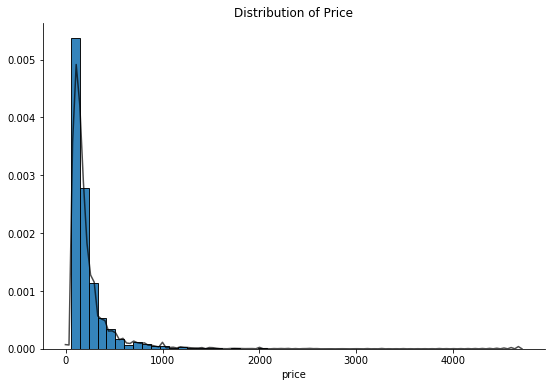

In [112]:
#EDA y
from statlearning import plot_dist
plot_dist(train_FE['price'])
plt.title('Distribution of Price')
plt.show()

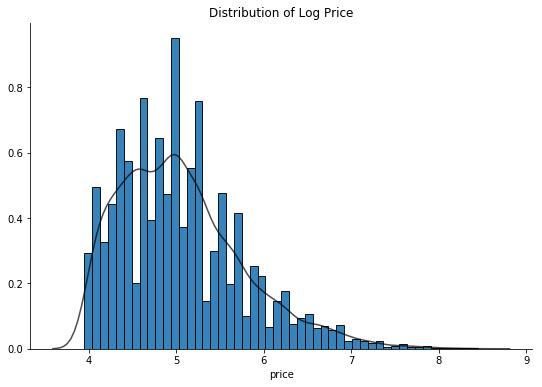

In [113]:
log_y_train=np.log(train_FE['price'])
from statlearning import plot_dist
plot_dist(log_y_train)
plt.title('Distribution of Log Price')
plt.show()

In [114]:
continuous=[]
discrete=[]
dummy=[]
for i in train_FE_S.columns:
    if train_FE_S[i].value_counts().shape[0]>20:
        continuous.append(i)
    elif train_FE_S[i].value_counts().shape[0]==2:
        dummy.append(i)
    elif train_FE_S[i].value_counts().shape[0]<=2:
        dummy.append(i)
    else:
        discrete.append(i)


print(continuous)
print(discrete)
print(dummy)
        

['space', 'neighborhood_overview', 'transit', 'access', 'house_rules', 'host_since', 'host_response_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'amenities', 'security_deposit_perc', 'cleaning_fee_perc', 'extra_people_perc', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'reviews_per_month', 'price', 'review_g']
['name', 'summary', 'description', 'host_response_time', 'host_verifications', 'accommodates', 'bathrooms', 'bedro

In [115]:
#describe/skew
describe=train_FE_S.describe()
describe.loc['skew', :]=train_FE_S.skew()
describe.loc['kurt', :]=train_FE_S.kurt()
describe[continuous].round(3)

,space,neighborhood_overview,transit,access,house_rules,host_since,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,amenities,security_deposit_perc,cleaning_fee_perc,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month,price,review_g
count,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000,9803.000
mean,60.711,37.463,31.075,18.970,31.617,1403.522,50.543,9.213,9.213,-33.863,151.208,22.942,228.004,49.146,8.478,5.170,675.999,4.844,5.646,671.267,676.910,5.227,673.966,9.201,20.357,32.376,97.942,15.015,6.454,93.645,9.580,9.282,9.743,9.749,9.728,9.334,7.519,6.791,0.806,214.769,389.698
std,61.283,44.392,38.616,28.684,50.744,716.147,48.758,30.632,30.632,0.072,0.080,12.142,328.420,30.138,18.332,19.342,530.686,18.971,19.685,531.179,546.926,19.291,539.100,11.532,23.789,36.310,121.913,34.173,13.611,8.812,0.864,1.102,0.701,0.709,0.626,0.941,24.511,24.586,1.390,250.639,415.723
min,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,-34.088,150.601,1.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,20.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,0.000,0.000,52.000,0.000
25%,1.000,1.000,1.000,1.000,1.000,891.000,0.000,1.000,1.000,-33.897,151.185,14.000,115.000,33.000,0.000,1.000,30.000,1.000,2.000,30.000,30.000,1.400,30.000,0.000,0.000,0.000,0.000,0.000,0.000,91.000,9.333,9.000,10.000,10.000,10.000,9.000,1.000,0.000,0.000,89.000,59.000
50%,40.000,22.000,19.000,8.000,8.000,1396.000,75.000,1.000,1.000,-33.881,151.217,20.000,228.109,44.000,0.000,2.000,1125.000,2.000,3.000,1125.000,1125.000,2.200,1125.000,0.000,5.000,11.000,40.000,2.000,1.000,96.000,10.000,10.000,10.000,10.000,10.000,9.500,1.000,1.000,0.160,146.000,389.740
75%,105.000,57.000,44.000,24.000,35.000,1885.000,100.000,3.000,3.000,-33.832,151.263,30.000,228.109,58.000,12.000,5.000,1125.000,5.000,5.000,1125.000,1125.000,5.000,1125.000,20.000,45.000,71.000,174.000,12.000,6.000,100.000,10.000,10.000,10.000,10.000,10.000,10.000,2.000,1.000,1.000,237.000,406.000
max,207.000,209.000,204.000,195.000,204.000,3732.000,100.000,279.000,279.000,-33.390,151.340,97.000,10769.000,308.000,425.000,1000.000,3000.000,1000.000,1000.000,3000.000,9999.000,1000.000,9978.300,30.000,60.000,90.000,365.000,576.000,160.000,100.000,10.000,10.000,10.000,10.000,10.000,10.000,197.000,197.000,13.490,4656.000,3427.000
skew,0.729,1.418,1.902,2.676,1.994,0.124,-0.046,5.788,5.788,1.168,-2.245,1.095,13.794,1.846,6.182,25.741,-0.335,27.183,24.640,-0.317,0.698,25.907,0.216,0.758,0.605,0.504,1.049,4.605,3.371,-3.323,-3.947,-2.805,-5.139,-5.184,-4.100,-2.900,5.490,5.521,2.851,5.408,1.977
kurt,-0.870,1.431,3.914,8.683,2.870,-0.481,-1.966,38.530,38.530,3.418,8.504,1.407,303.047,6.562,82.363,996.735,-1.779,1078.359,929.539,-1.791,15.315,1006.804,7.217,-1.110,-1.339,-1.466,-0.268,30.815,14.530,17.325,22.829,11.431,38.898,38.654,28.560,13.988,32.373,32.589,10.797,48.349,5.236


In [116]:
train_FE_S.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,review_g,host_is_superhost_t,host_identity_verified_t,is_location_exact_t,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_House,property_type_Townhouse,property_type_other,room_type_Private room,room_type_Shared room,bed_type_other,instant_bookable_t,cancellation_policy_2,cancellation_policy_3,cancellation_policy_5,cancellation_policy_6,cancellation_policy_luxury_moderate,require_guest_profile_picture_t,require_guest_phone_verification_t
1,2,3,9,3,51,0,39,1,0,1,1226,1,1,4,100,1.0,1.0,6,-33.75546,151.29509,3,1.0,1.0,2.0,18,160.000000,68.0,2,8.0,3,60,3,3,60,60,3.0,60.0,1,14,44,311,2,1,70.0,10.0,7.0,10.0,10.0,10.0,10.0,2,1,1,0,0.15,125.0,217.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,1,0,1,1,0,1,2119,1,0,1,0,1.0,1.0,2,-33.89182,151.17723,2,1.0,1.0,1.0,6,228.108952,44.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,0,0,0,0,0,80.0,10.0,8.0,10.0,10.0,10.0,10.0,1,0,1,0,0.00,99.0,389.740056,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,2,10,6,71,1,8,1,1,1,1640,1,1,1,0,1.0,1.0,5,-33.89516,151.13671,2,1.0,1.0,1.0,9,228.108952,44.0,1,0.0,5,1125,5,5,1125,1125,5.0,1125.0,28,58,88,179,0,0,90.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0,1,0,0.00,99.0,389.740056,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0,1,1,1,1,0,1,1,0,1,574,1,0,1,0,1.0,1.0,3,-33.90404,151.22385,4,1.5,2.0,2.0,10,228.108952,20.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,0,0.05,125.0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5,0,0,1,0,1,1,1,1,0,1,1883,1,1,6,100,124.0,124.0,5,-33.86783,151.20329,2,1.0,1.0,1.0,33,114.000000,82.0,2,18.0,90,1125,14,90,1125,1125,77.0,1125.0,14,29,59,334,1,1,100.0,10.0,8.0,10.0,10.0,10.0,10.0,122,122,0,0,0.20,220.0,0.000000,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


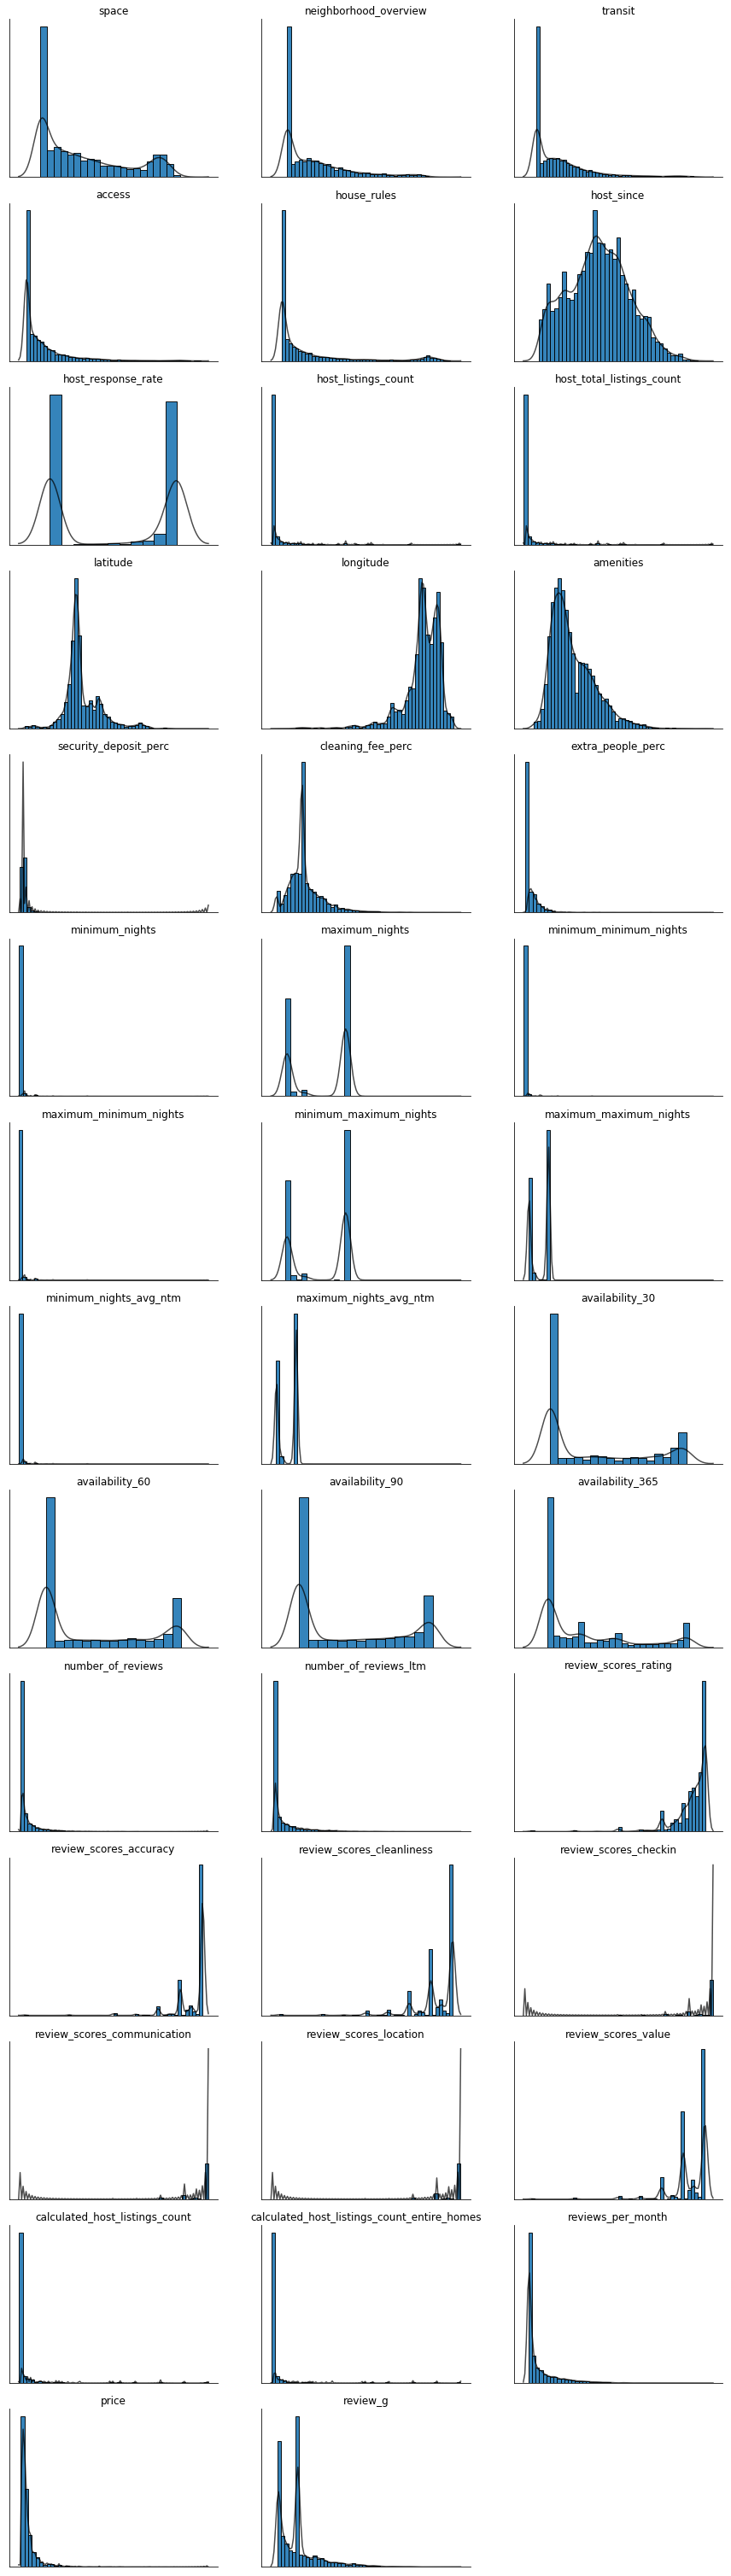

In [117]:
#distribution plot
from statlearning import plot_dists
plot_dists(train_FE_S[continuous]) 
plt.show()

In [118]:
train_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9803 entries, 1 to 9837
Data columns (total 76 columns):
name                                            9803 non-null object
summary                                         9803 non-null object
space                                           9803 non-null object
description                                     9803 non-null object
experiences_offered                             9803 non-null object
neighborhood_overview                           9803 non-null object
notes                                           9803 non-null int64
transit                                         9803 non-null object
access                                          9803 non-null object
interaction                                     9803 non-null int64
house_rules                                     9803 non-null object
host_since                                      9803 non-null object
host_location                                   9803 non-null objec

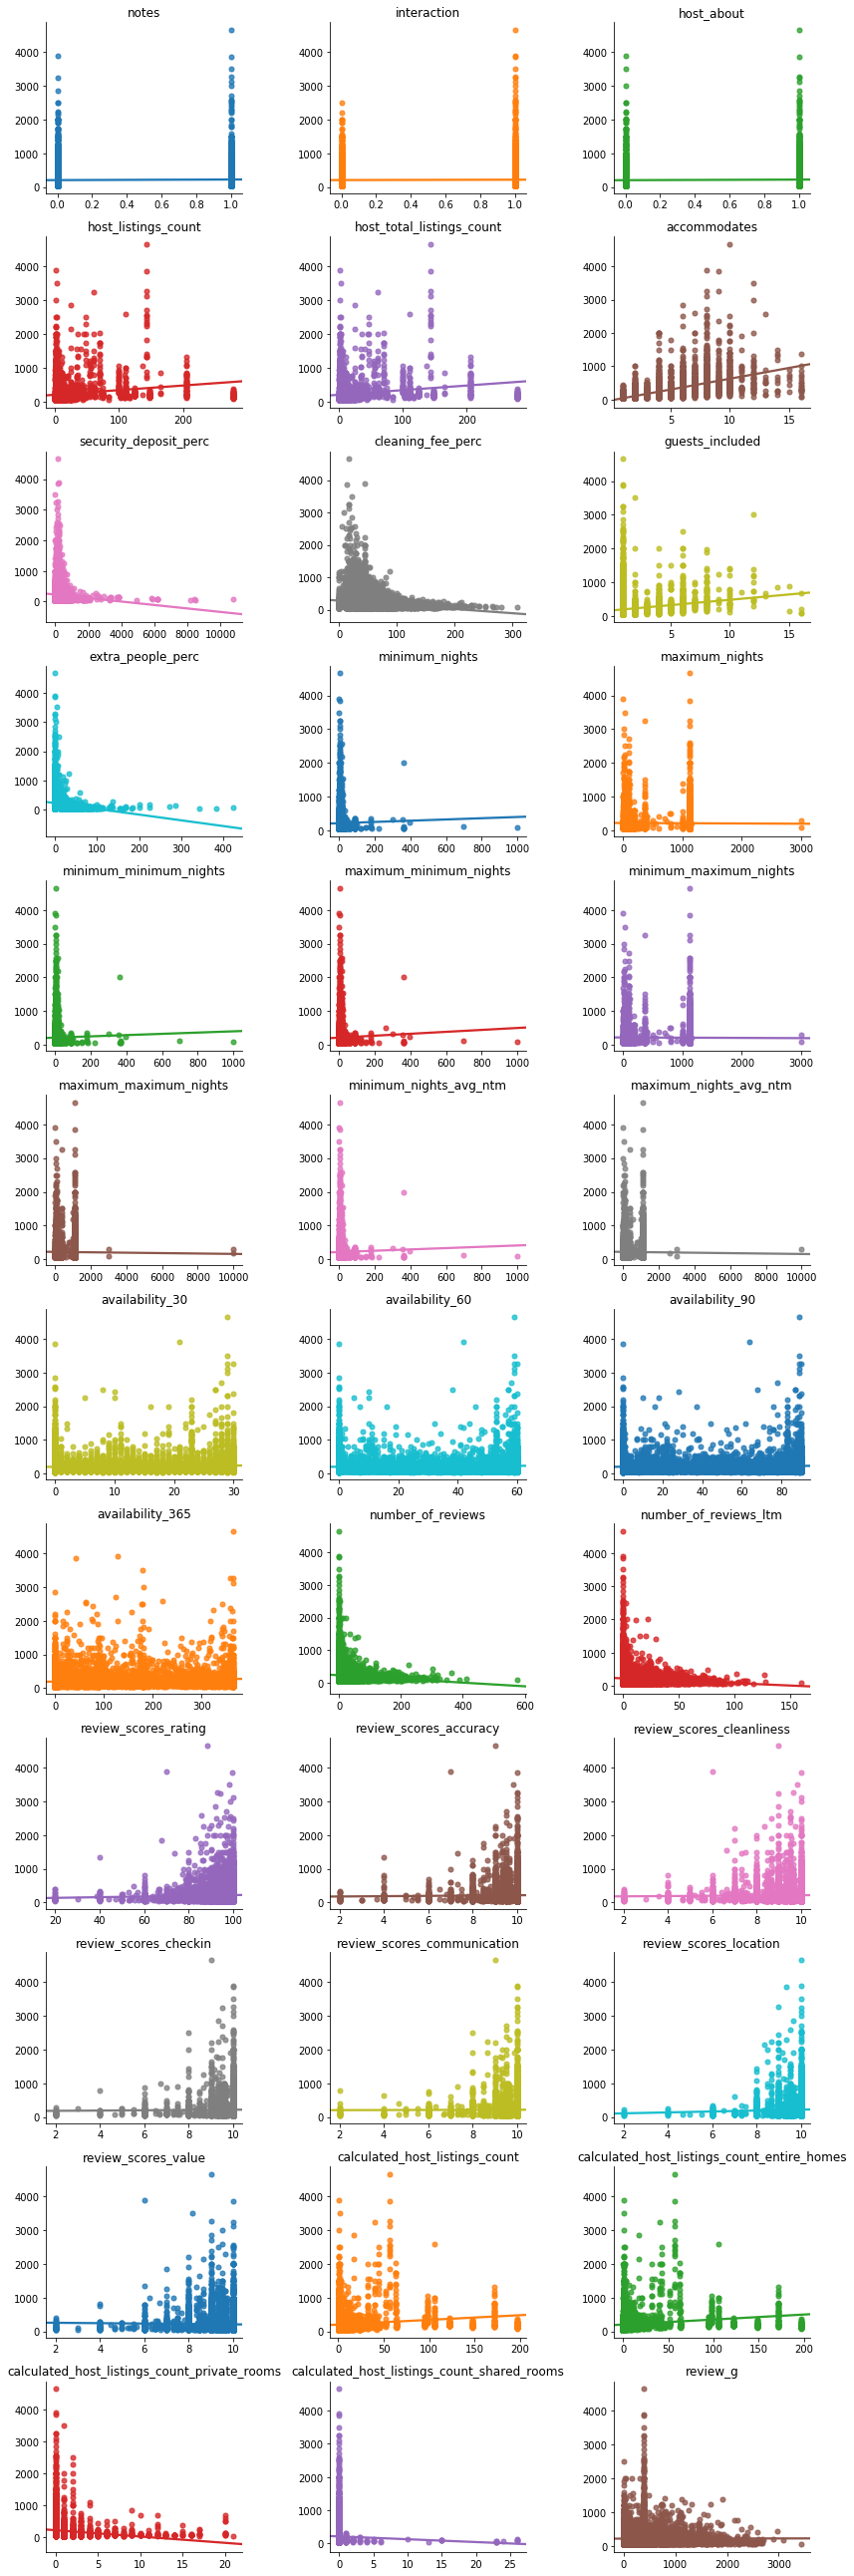

In [119]:
#new
from statlearning import plot_regressions
numerical=['notes','interaction','host_about','host_listings_count','host_total_listings_count','accommodates','security_deposit_perc','cleaning_fee_perc','guests_included','extra_people_perc','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30','availability_60','availability_90','availability_365','number_of_reviews','number_of_reviews_ltm','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','review_g']
plot_regressions(train_FE[numerical], train_FE['price'])
plt.show()

In [120]:
#regression 1
#from statlearning import plot_regressions
#re_continuous=continuous.copy()
#re_continuous=continuous.remove('price')
#plot_regressions(train_FE_S[continuous], train_FE_S['price'])
#plt.show()

In [121]:
#plot_regressions(train_FE_S[discrete], train_FE_S['price'])
#plt.show()

In [122]:
#from statlearning import crosstabplots
#crosstabplots(train_FE_S[dummy], train_FE_S['price'])
#plt.show()

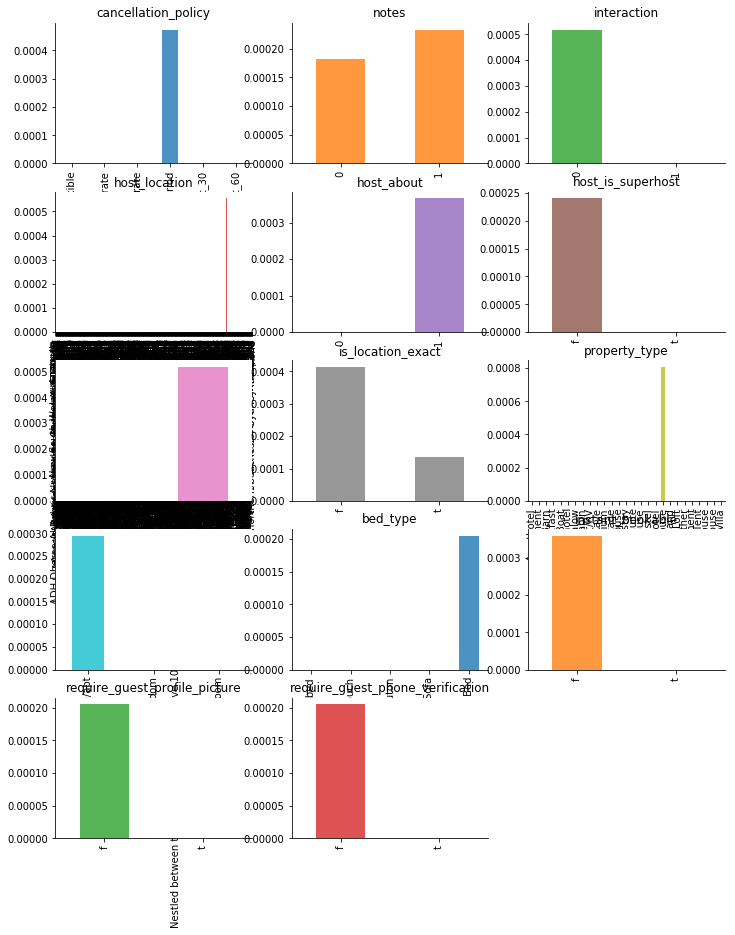

In [123]:

D=['cancellation_policy','notes', 'interaction', 'host_location', 'host_about', 'host_is_superhost', 'host_identity_verified', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable', 'require_guest_profile_picture','require_guest_phone_verification']
from statlearning import crosstabplots
crosstabplots(train_fill[D], train_fill['price'])
plt.show()

In [124]:
#box plot
#fig. axes=plt.subpolts(1,6,figsize=(20,4))
#sns.boxplot(y='price', x=t, data=train_FE_S, orient='v', ax=axes[i % 6])
#for i,t in enumerate(dummy):
    #sns.boxplot(y='price', x=t, data=train_FE_S, orient='v')

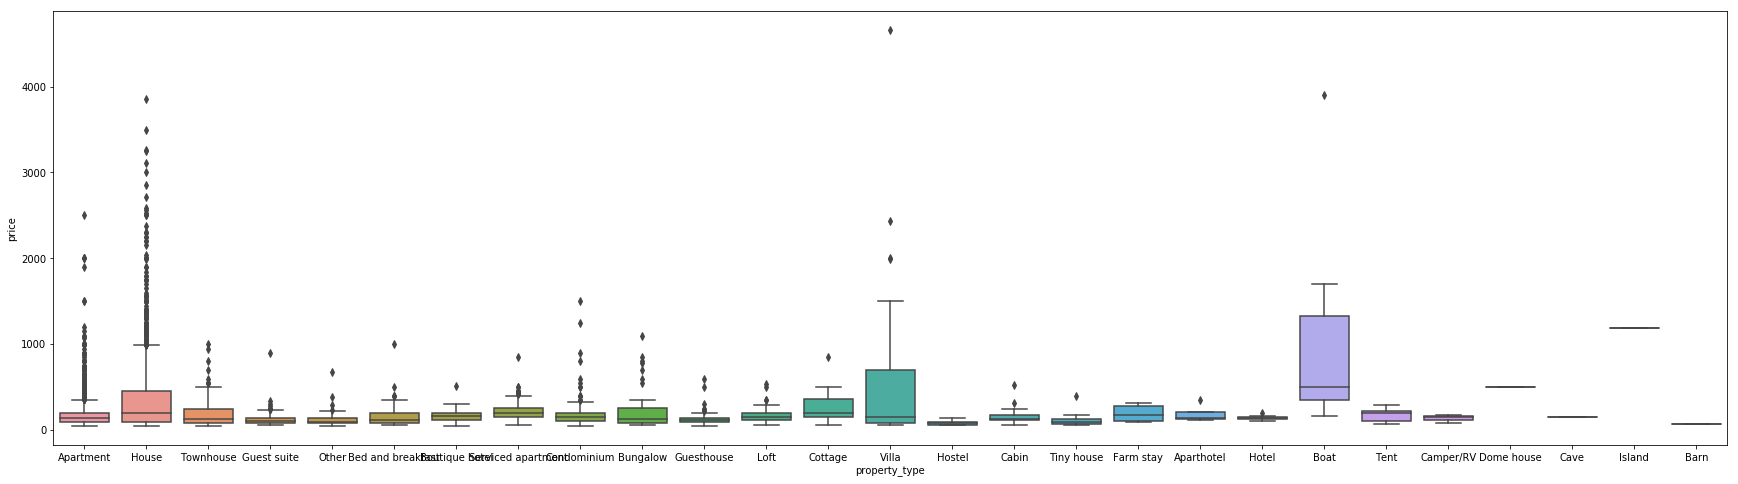

In [125]:
#box plot1
plt.rcParams['figure.figsize'] = (30, 8)
sns.boxplot(x=train_FE['property_type'], y = train_FE['price'], orient='v')

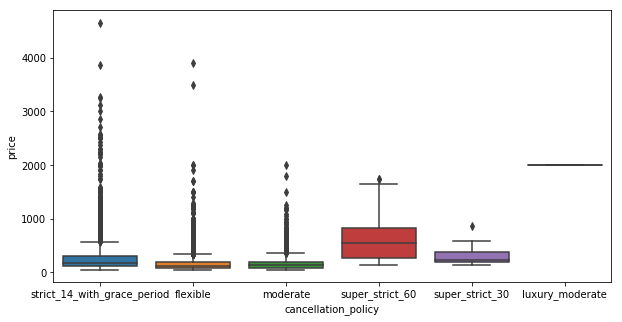

In [126]:
#box plot2
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxplot(x=train_FE['cancellation_policy'], y = train_FE['price'], orient='v')

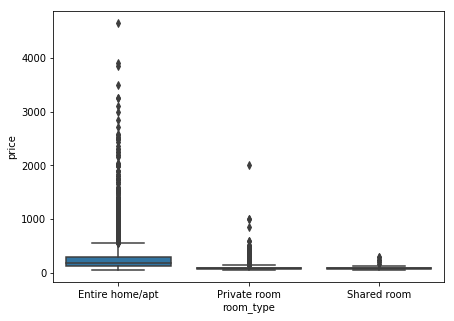

In [127]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.boxplot(x=train_FE['room_type'], y = train_FE['price'], orient='v')

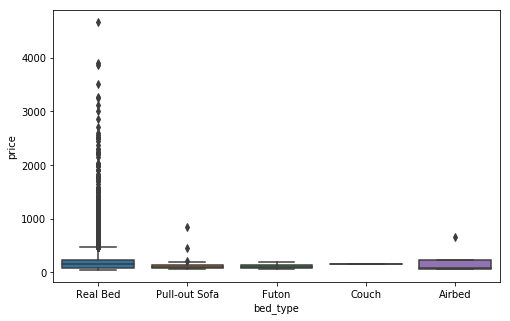

In [128]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.boxplot(x=train_FE['bed_type'], y = train_FE['price'], orient='v')

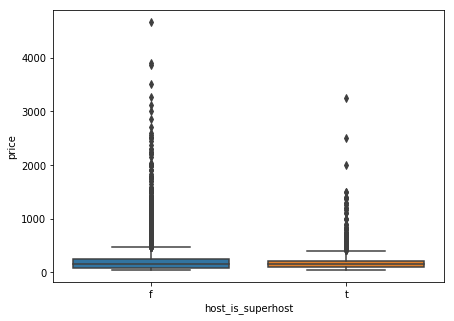

In [129]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.boxplot(x=train_FE['host_is_superhost'], y = train_FE['price'], orient='v')

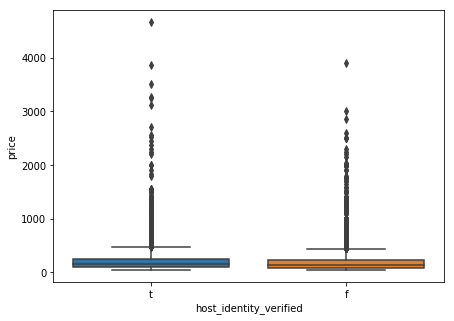

In [130]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.boxplot(x=train_FE['host_identity_verified'], y = train_FE['price'], orient='v')

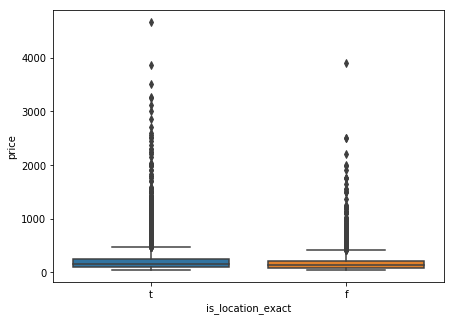

In [131]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.boxplot(x=train_FE['is_location_exact'], y = train_FE['price'], orient='v')

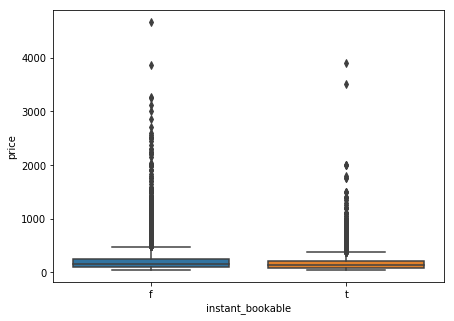

In [132]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.boxplot(x=train_FE['instant_bookable'], y = train_FE['price'], orient='v')

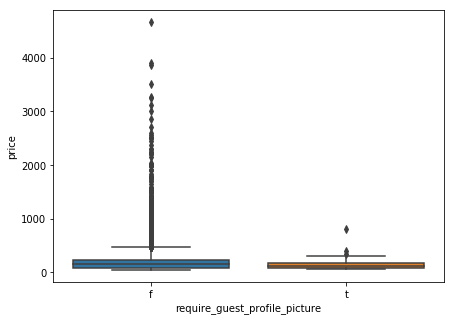

In [133]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.boxplot(x=train_FE['require_guest_profile_picture'], y = train_FE['price'], orient='v')

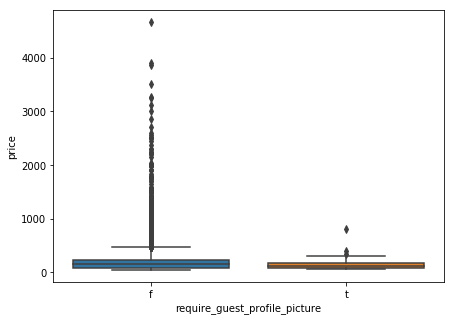

In [134]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.boxplot(x=train_FE['require_guest_profile_picture'], y = train_FE['price'], orient='v')

In [135]:
corr=train_FE_S.corr()['price'].abs().sort_values().tail(25)
print(corr)

instant_bookable_t                              0.092604
cancellation_policy_5                           0.095372
reviews_per_month                               0.096597
availability_365                                0.101327
amenities                                       0.109437
cancellation_policy_6                           0.116979
calculated_host_listings_count_private_rooms    0.132709
calculated_host_listings_count                  0.135611
extra_people_perc                               0.142374
calculated_host_listings_count_entire_homes     0.145348
cleaning_fee_perc                               0.155678
host_listings_count                             0.166202
host_total_listings_count                       0.166202
longitude                                       0.169187
cancellation_policy_3                           0.179627
guests_included                                 0.179796
space                                           0.181311
latitude                       

In [136]:
train_FE_S_corr=train_FE_S[corr.loc[(corr>0.1)|(corr<0.1)].index]
test_FE_S_corr=test_FE_S[corr.loc[(corr>0.1)|(corr<0.1)].index.drop('price')]

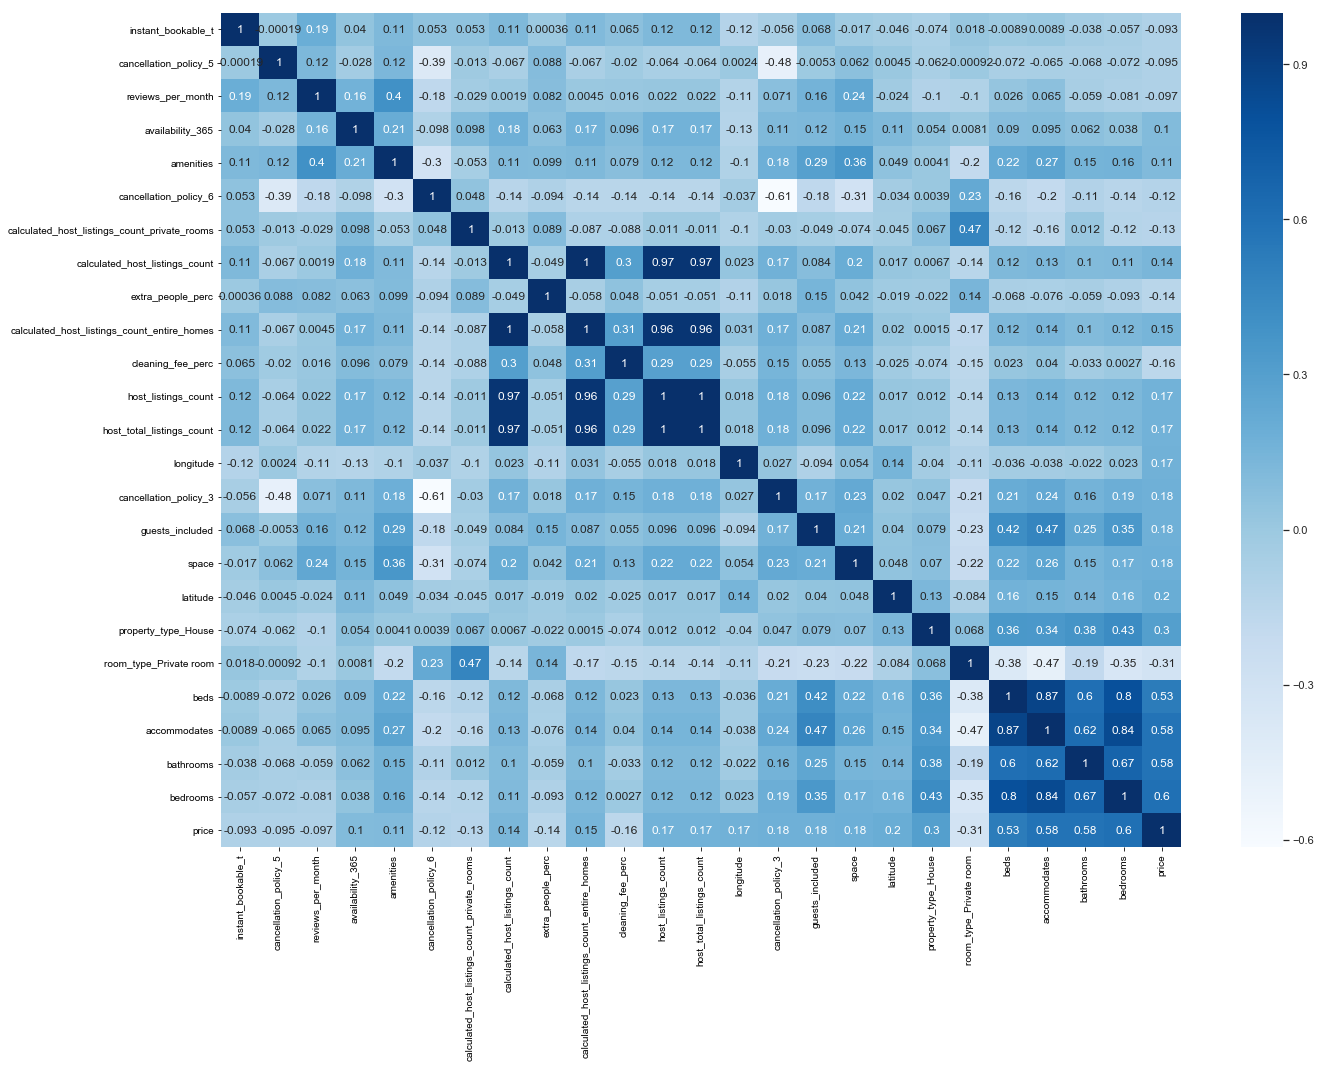

In [137]:
f,ax=plt.subplots(figsize=(20,15))
sns.set(style="whitegrid")
sns.heatmap(train_FE_S_corr.corr(),annot=True,cmap='Blues')
plt.tight_layout()

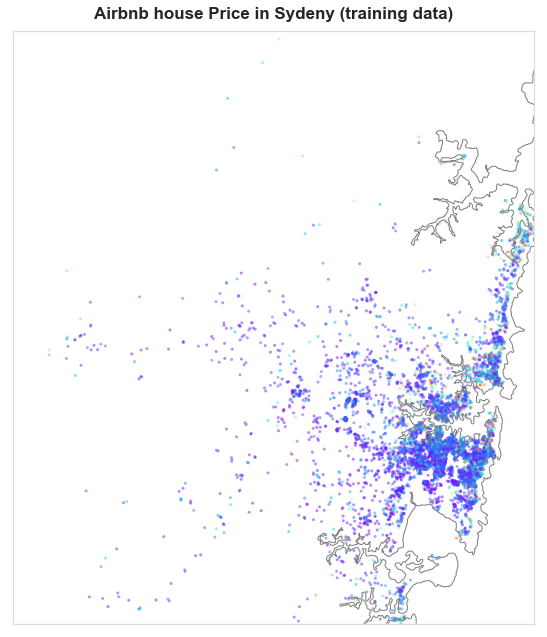

In [138]:
#map
train_FE_S1=train_FE_S.loc[train_FE_S['price']<800]

#import os
#os.environ['PROJ_LIB'] = r'C:\Users\xps\Anaconda3\Library\share'

from mpl_toolkits.basemap import Basemap

def Sydney_map(ax=None, lllat=-34.088290, urlat=-33.389730,
                   lllon=150.601470,urlon=151.339810):
# This function is based on "Data Analytics Using Open-Source Tools" by Jeffrey Strickland
    
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon, resolution='f')
    m.drawstates()
    m.drawcountries()
    m.drawcoastlines(color='grey')
    return m


# Plot Figure
fig, ax = plt.subplots(figsize=(9,9))
m = Sydney_map()
x, y = m(train_FE_S1['longitude'].as_matrix(), train_FE_S1['latitude'].as_matrix())

cmap = sns.diverging_palette(220, 10, as_cmap=True)
m.scatter(x,y,s=9, c=train_FE_S1['price'], edgecolors='none', cmap=plt.get_cmap('rainbow'),
         alpha=0.5)

ax.set_title('Airbnb house Price in Sydeny (training data)', fontsize=17, y=1.01, fontweight='bold')
ax.spines['bottom'].set_color('#DDDDDD')
ax.spines['top'].set_color('#DDDDDD')
ax.spines['right'].set_color('#DDDDDD')
ax.spines['left'].set_color('#DDDDDD')

plt.tight_layout()
plt.show()

In [139]:
#outliers
train_FE_o=train_FE_S[-((train_FE_S['price']>2900)|(train_FE_S['review_g']>3000)|(train_FE_S['security_deposit_perc']>3000)|(train_FE_S['minimum_minimum_nights']>600)|(train_FE_S['maximum_minimum_nights']>600)|(train_FE_S['maximum_maximum_nights']>9000)|(train_FE_S['minimum_nights_avg_ntm']>600)|(train_FE_S['maximum_nights_avg_ntm']>9000))]

In [140]:
train_FE_o.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,review_g,host_is_superhost_t,host_identity_verified_t,is_location_exact_t,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_House,property_type_Townhouse,property_type_other,room_type_Private room,room_type_Shared room,bed_type_other,instant_bookable_t,cancellation_policy_2,cancellation_policy_3,cancellation_policy_5,cancellation_policy_6,cancellation_policy_luxury_moderate,require_guest_profile_picture_t,require_guest_phone_verification_t
1,2,3,9,3,51,0,39,1,0,1,1226,1,1,4,100,1.0,1.0,6,-33.75546,151.29509,3,1.0,1.0,2.0,18,160.000000,68.0,2,8.0,3,60,3,3,60,60,3.0,60.0,1,14,44,311,2,1,70.0,10.0,7.0,10.0,10.0,10.0,10.0,2,1,1,0,0.15,125.0,217.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,1,0,1,1,0,1,2119,1,0,1,0,1.0,1.0,2,-33.89182,151.17723,2,1.0,1.0,1.0,6,228.108952,44.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,0,0,0,0,0,80.0,10.0,8.0,10.0,10.0,10.0,10.0,1,0,1,0,0.00,99.0,389.740056,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,2,10,6,71,1,8,1,1,1,1640,1,1,1,0,1.0,1.0,5,-33.89516,151.13671,2,1.0,1.0,1.0,9,228.108952,44.0,1,0.0,5,1125,5,5,1125,1125,5.0,1125.0,28,58,88,179,0,0,90.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0,1,0,0.00,99.0,389.740056,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0,1,1,1,1,0,1,1,0,1,574,1,0,1,0,1.0,1.0,3,-33.90404,151.22385,4,1.5,2.0,2.0,10,228.108952,20.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,0,0.05,125.0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5,0,0,1,0,1,1,1,1,0,1,1883,1,1,6,100,124.0,124.0,5,-33.86783,151.20329,2,1.0,1.0,1.0,33,114.000000,82.0,2,18.0,90,1125,14,90,1125,1125,77.0,1125.0,14,29,59,334,1,1,100.0,10.0,8.0,10.0,10.0,10.0,10.0,122,122,0,0,0.20,220.0,0.000000,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [141]:
test_FE_S.shape

(22957, 76)

In [142]:
#def x/y
y_train=train_FE_o['price']
x_train=train_FE_o.drop(['price'],axis='columns')
#x_train=train_FE_o.copy()
x_test=test_FE_S.copy()

In [143]:
x_train['latitude']= -x_train['latitude']
x_test['latitude']= -x_test['latitude']

In [144]:
continuous_new=[]
discrete_new=[]
dummy_new=[]
for i in x_train.columns:
    if x_train[i].value_counts().shape[0]>20:
        continuous_new.append(i)
    elif x_train[i].value_counts().shape[0]==2:
        dummy_new.append(i)
    elif x_train[i].value_counts().shape[0]<=2:
        dummy_new.append(i)
    else:
        discrete_new.append(i)


print(continuous_new)
print(discrete_new)
print(dummy_new)
        

['space', 'neighborhood_overview', 'transit', 'access', 'house_rules', 'host_since', 'host_response_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'amenities', 'security_deposit_perc', 'cleaning_fee_perc', 'extra_people_perc', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'reviews_per_month', 'review_g']
['name', 'summary', 'description', 'host_response_time', 'host_verifications', 'accommodates', 'bathrooms', 'bedrooms', 'be

In [145]:
x_train[continuous_new+discrete_new]=np.log1p(x_train[continuous_new+discrete_new])
x_train_log=x_train.copy()

x_test[continuous_new+discrete_new]=np.log1p(x_test[continuous_new+discrete_new])
x_test_log=x_test.copy()

In [146]:
x_test_log.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_g,host_is_superhost_t,host_identity_verified_t,is_location_exact_t,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_House,property_type_Townhouse,property_type_other,room_type_Private room,room_type_Shared room,bed_type_other,instant_bookable_t,cancellation_policy_2,cancellation_policy_3,cancellation_policy_5,cancellation_policy_6,cancellation_policy_luxury_moderate,require_guest_profile_picture_t,require_guest_phone_verification_t
0,0.000000,0.000000,3.135494,0.000000,2.197225,1,2.302585,2.197225,1,0.693147,6.966024,1,1,1.945910,4.543295,1.791759,1.791759,2.079442,3.552572,5.025284,1.386294,0.693147,0.693147,1.098612,3.332205,5.209486,2.708050,0.693147,0.000000,0.693147,7.026427,0.693147,0.693147,7.026427,7.026427,0.693147,7.026427,0.000000,0.000000,0.000000,0.000000,3.951244,3.951244,4.595120,2.397895,2.397895,2.397895,2.397895,2.397895,2.397895,1.386294,1.386294,0.000000,0.0,1.803359,5.181784,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0.693147,1.386294,5.220356,1.945910,5.135798,1,4.521789,4.369448,1,0.693147,7.434257,1,1,1.945910,4.615121,1.098612,1.098612,2.079442,3.552144,5.025698,1.098612,0.693147,0.693147,0.693147,3.555348,0.000000,4.744932,1.098612,4.564348,1.098612,7.026427,1.098612,1.791759,7.026427,7.026427,1.193922,7.026427,0.000000,1.098612,1.098612,5.537334,3.871201,3.218876,4.584967,2.397895,2.302585,2.397895,2.397895,2.397895,2.397895,1.098612,1.098612,0.000000,0.0,1.095273,6.440947,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0.693147,0.693147,2.484907,1.386294,3.663562,0,0.693147,0.693147,1,2.484907,7.262629,1,1,1.945910,4.615121,0.693147,0.693147,1.791759,3.552484,5.025232,1.098612,0.693147,0.693147,0.693147,2.708050,5.910797,4.317488,0.693147,0.000000,0.693147,3.433987,0.693147,0.693147,3.433987,3.433987,0.693147,3.433987,3.332205,3.784190,3.784190,3.784190,2.484907,2.484907,4.595120,2.397895,2.397895,2.397895,2.397895,2.302585,2.302585,0.693147,0.000000,0.693147,0.0,1.004302,5.241747,1,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
3,0.000000,0.000000,2.639057,0.000000,2.302585,1,2.079442,2.708050,1,2.302585,6.862758,1,1,0.693147,0.000000,1.098612,1.098612,1.386294,3.551325,5.025225,1.098612,0.693147,0.693147,0.693147,2.484907,4.890349,2.944439,0.693147,2.944439,1.098612,1.791759,1.098612,1.098612,1.791759,1.791759,1.098612,1.791759,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,4.615121,2.397895,2.397895,2.397895,2.397895,2.397895,2.302585,1.098612,0.000000,1.098612,0.0,0.095310,3.828641,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0.000000,0.000000,4.804021,1.098612,5.170484,1,4.795791,3.258097,1,1.945910,7.494986,1,1,1.791759,4.615121,1.098612,1.098612,1.791759,3.545312,5.025923,1.609438,0.693147,1.098612,1.386294,2.995732,5.433184,3.135494,1.098612,2.833213,1.098612,3.433987,1.098612,1.098612,3.433987,3.433987,1.098612,3.433987,0.000000,2.302585,3.688879,3.713572,2.197225,0.000000,4.595120,2.397895,2.397895,2.397895,2.397895,2.397895,2.397895,1.098612,1.098612,0.000000,0.0,0.190620,5.8

In [147]:
x_train_log.shape

(9767, 76)

In [148]:
x_test_log.shape

(22957, 76)

In [149]:
y_train_log=np.log1p(y_train)

In [150]:
#Laso
from sklearn.linear_model import LassoCV

lassoCV = LassoCV(cv=5)
lassoCV.fit(x_train_log, y_train_log)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [151]:
len(x_train_log.columns)-np.sum(lassoCV.coef_==0.0)

66

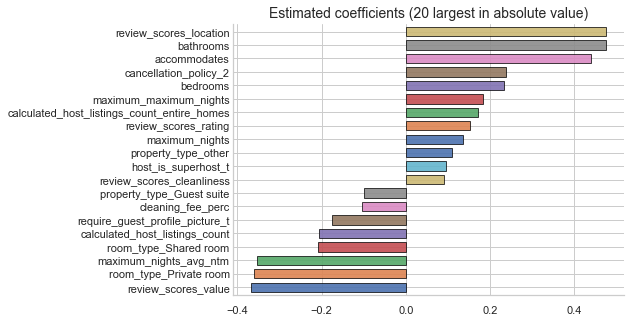

In [152]:
from statlearning import plot_coefficients
plot_coefficients(lassoCV, x_train_log.columns)
plt.show()

In [153]:
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
pred_L= lassoCV.predict(x_train_log)
rmse_L = np.sqrt(mean_squared_error(y_train_log, pred_L))
rmse_L

0.4011676673637434

In [154]:
coef = pd.Series(lassoCV.coef_, index = x_train_log.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 66 variables and eliminated the other 10 variables


In [155]:
a = pd.DataFrame(lassoCV.coef_.reshape(1,76), columns= x_train_log.columns)

In [156]:
a

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_g,host_is_superhost_t,host_identity_verified_t,is_location_exact_t,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_House,property_type_Townhouse,property_type_other,room_type_Private room,room_type_Shared room,bed_type_other,instant_bookable_t,cancellation_policy_2,cancellation_policy_3,cancellation_policy_5,cancellation_policy_6,cancellation_policy_luxury_moderate,require_guest_profile_picture_t,require_guest_phone_verification_t
0,0.033876,0.014124,0.017161,-0.015648,0.016096,-0.0,-0.021405,-0.000652,-0.015452,0.002294,0.045634,0.007048,-0.0,-0.064815,-0.012514,0.072865,3.691296e-18,-0.029208,-0.0,0.0,0.439433,0.474415,0.231935,0.068743,0.044216,0.001343,-0.104248,0.039539,-0.061888,-0.047326,0.135389,-0.004692,0.052192,0.026416,0.183999,-0.027531,-0.353252,0.043618,-0.027823,-0.008121,0.033614,-0.033271,-0.004871,0.152651,0.0,0.091608,-0.0,-0.0,0.475062,-0.367792,-0.205519,0.170865,0.043926,-0.052718,-0.073148,0.004624,0.094422,-0.00298,0.000431,0.056501,-0.099545,-0.068714,0.073206,-0.008385,0.109299,-0.359402,-0.208556,-0.0,-0.04968,0.238022,-0.008867,-0.080973,-0.089892,0.0,-0.175561,-0.0


In [157]:
cols1=[x for i,x in enumerate(a.columns) if a.iat[0,i]!=0]

print(cols1)

['name', 'summary', 'space', 'description', 'neighborhood_overview', 'transit', 'access', 'interaction', 'house_rules', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'security_deposit_perc', 'cleaning_fee_perc', 'guests_included', 'extra_people_perc', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_share

In [158]:
cols=[x for i,x in enumerate(a.columns) if a.iat[0,i]==0]

print(cols)

['notes', 'host_about', 'latitude', 'longitude', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication', 'bed_type_other', 'cancellation_policy_luxury_moderate', 'require_guest_phone_verification_t']


In [159]:
x_train_lasso = x_train_log.drop(['notes', 'host_about', 'latitude', 'longitude', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication', 'bed_type_other', 'cancellation_policy_luxury_moderate', 'require_guest_phone_verification_t'], axis='columns')

In [160]:
x_test_lasso = x_test_log.drop(['notes', 'host_about', 'latitude', 'longitude', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication', 'bed_type_other', 'cancellation_policy_luxury_moderate', 'require_guest_phone_verification_t'], axis='columns')

In [161]:
x_train_lasso.shape

(9767, 66)

In [162]:
x_test_lasso.shape

(22957, 66)

In [163]:
#time xgboost
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=0)

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500, 2000],
    'max_depth' : [2,3,4],
    'subsample' : [0.6, 0.8, 1.0]
}

xbst = RandomizedSearchCV(model, tuning_parameters, n_iter = 32, cv = 5, random_state=87, n_jobs=4)
xbst.fit(x_train_lasso, y_train_log)

print('Best parameters found by randomised search:', xbst.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.05} 



In [164]:
# refit 
xbst_re = xgb.XGBRegressor(learning_rate= 0.05, max_depth = 4, n_estimators= 500, subsample = 0.6,  reg_lambda=0,
                        n_iter = 32, cv = 5, random_state=87, n_jobs=4,objective='reg:squarederror')
xbst_re.fit(x_train_lasso, y_train_log)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, cv=5, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
       n_iter=32, n_jobs=4, nthread=None, objective='reg:squarederror',
       random_state=87, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.6, verbosity=1)

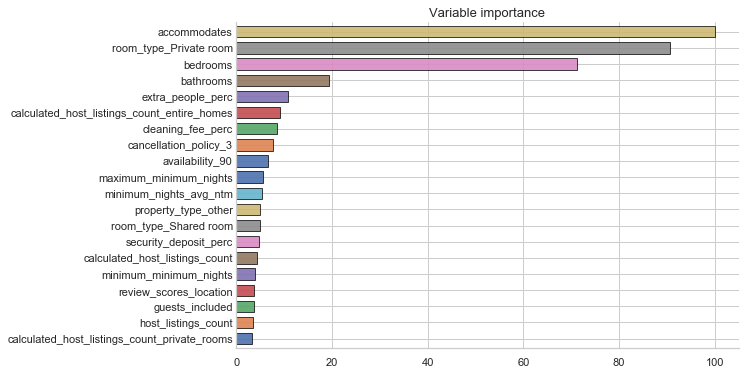

In [165]:
from statlearning import plot_feature_importance

predictors= list(x_train_lasso.columns)
plot_feature_importance(xbst_re, labels=predictors)
plt.show()

In [166]:
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
pred_xgb= xbst_re.predict(x_train_lasso)
rmse_xgb = np.sqrt(mean_squared_error(y_train_log, pred_xgb))
rmse_xgb

0.2685925156087238

In [167]:
# OLS Linear Regression
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(x_train_lasso, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [168]:
#Ridge
from sklearn.linear_model import RidgeCV

alphas=list(np.logspace(-15,15,151,base=2))
ridge=RidgeCV(alphas=alphas,cv=5)
ridge.fit(x_train_lasso, y_train_log)


RidgeCV(alphas=array([3.05176e-05, 3.50555e-05, ..., 2.85262e+04, 3.27680e+04]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [169]:
len(x_train_log.columns)-np.sum(ridge.coef_==0.0)

76

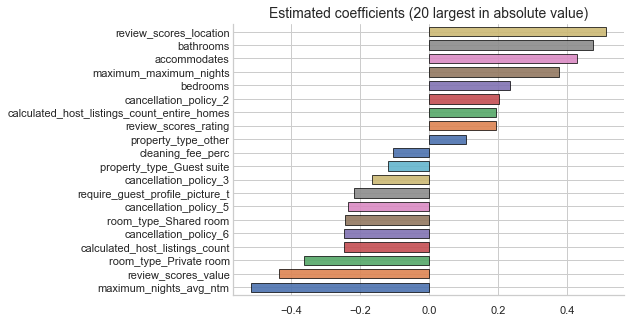

In [170]:
from statlearning import plot_coefficients
plot_coefficients(ridge, x_train_lasso.columns)
plt.show()

In [171]:
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
pred_rr= ridge.predict(x_train_lasso)
rmse_rr = np.sqrt(mean_squared_error(y_train_log, pred_rr))
rmse_rr

0.400517109942106

In [172]:
#ElasticNet
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)
enet.fit(x_train_lasso, y_train_log)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
       max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [173]:
enet.l1_ratio_

0.99

In [174]:
len(x_train_lasso.columns)-np.sum(enet.coef_==0.0)

66

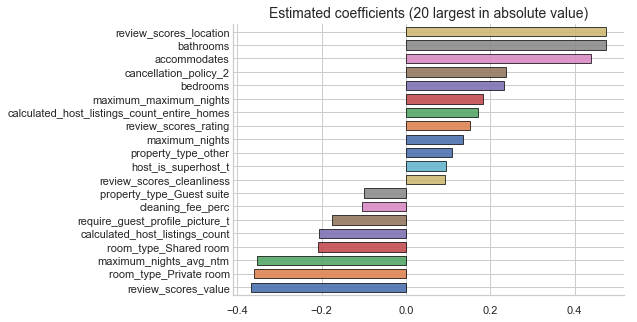

In [175]:
plot_coefficients(enet, x_train_lasso.columns)
plt.show()

In [176]:
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
pred_enet= enet.predict(x_train_lasso)
rmse_enet = np.sqrt(mean_squared_error(y_train_log, pred_enet))
rmse_enet

0.40116880781013026

In [177]:
#RandomForestRegressor
#time
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(n_estimators=500)
tuning_parameters = {
    'min_samples_leaf': [1,5,10,20,50],
    'max_features': np.arange(1, len(x_train_lasso.columns)+1),
}
rf_search = RandomizedSearchCV(rf, tuning_parameters, n_iter= 16, cv = 5, n_jobs = 4, return_train_score=False, 
                               random_state=87)
rf_search.fit(x_train_lasso, y_train_log)
rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

Best parameters found by randomised search: {'min_samples_leaf': 1, 'max_features': 36} 



In [178]:
# refit 
rf_re = xgb.XGBRegressor(max_depth = 4, n_estimators= 500,min_samples_leaf =1,max_features=36, 
                        n_iter = 16, cv = 5, random_state=87, n_jobs=4,objective='reg:squarederror')
rf_re.fit(x_train_lasso, y_train_log)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, cv=5, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, max_features=36, min_child_weight=1,
       min_samples_leaf=1, missing=None, n_estimators=500, n_iter=16,
       n_jobs=4, nthread=None, objective='reg:squarederror',
       random_state=87, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

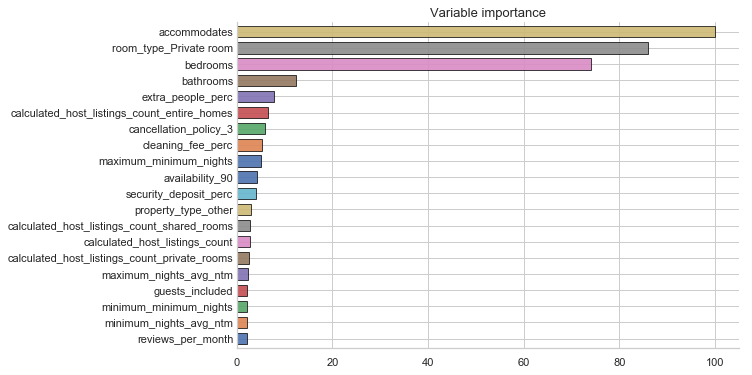

In [179]:
predictors= list(x_train_lasso.columns)
plot_feature_importance(rf_re, labels=predictors)
plt.show()

In [180]:
# Methods
from sklearn.linear_model import LinearRegression

# Model selection and evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

In [181]:
columns=['Test RMSE', 'Test R2', 'Test MAE']
rows=['XGBoost','Linear regression', 'Ridge','RandomForest','ElasticNet']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[xbst_re,ols,ridge,rf_search,enet]

for i, method in enumerate(methods):

    y_pred=method.predict(x_train_lasso)
    
    results.iloc[i,0] = np.sqrt(mean_squared_error(y_train_log,y_pred))
    results.iloc[i,1] = r2_score(y_train_log,y_pred)
    results.iloc[i,2] = mean_absolute_error(y_train_log,y_pred)

results.round(3)

,Test RMSE,Test R2,Test MAE
XGBoost,0.269,0.854,0.203
Linear regression,0.401,0.676,0.305
Ridge,0.401,0.676,0.305
RandomForest,0.130,0.966,0.097
ElasticNet,0.401,0.674,0.306


In [182]:
y_pred1=xbst_re.predict(x_test_lasso)

In [183]:
print(y_pred1)

[5.027706  4.5930395 4.2718234 ... 5.048201  5.57269   4.4211006]


In [184]:
sub=pd.DataFrame(np.c_[x_test_lasso.index,np.exp(y_pred1)], columns=['id','price'])
sub['id']=sub['id'].astype(int)
sub['price']=sub['price'].astype(int)
sub.to_csv('kaggle_boost.csv', index=False)

In [185]:
print(sub['price'].shape)

(22957,)


In [186]:
y_pred_rf=rf_search.predict(x_test_lasso)

In [187]:
sub=pd.DataFrame(np.c_[x_test_lasso.index,np.exp(y_pred_rf)], columns=['id','price'])
sub['id']=sub['id'].astype(int)
sub['price']=sub['price'].astype(int)
sub.to_csv('kaggle_RF1.csv', index=False)

In [188]:
y_pred_ols=ols.predict(x_test_lasso)

In [189]:
sub=pd.DataFrame(np.c_[x_test_lasso.index,np.exp(y_pred_ols)], columns=['id','price'])
sub['id']=sub['id'].astype(int)
sub['price']=sub['price'].astype(int)
sub.to_csv('kaggle_OLS1.csv', index=False)

In [190]:
y_pred_ridge=ridge.predict(x_test_lasso)

In [191]:
sub=pd.DataFrame(np.c_[x_test_lasso.index,np.exp(y_pred_ridge)], columns=['id','price'])
sub['id']=sub['id'].astype(int)
sub['price']=sub['price'].astype(int)
sub.to_csv('kaggle_RIDGE1.csv', index=False)

In [192]:
y_pred_elastic=enet.predict(x_test_lasso)

In [193]:
sub=pd.DataFrame(np.c_[x_test_lasso.index,np.exp(y_pred_elastic)], columns=['id','price'])
sub['id']=sub['id'].astype(int)
sub['price']=sub['price'].astype(int)
sub.to_csv('kaggle_ENET.csv', index=False)